In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download behrad3d/nasa-cmaps
! unzip nasa-cmaps.zip

 97% 12.0M/12.3M [00:00<00:00, 27.5MB/s]
100% 12.3M/12.3M [00:00<00:00, 30.4MB/s]
Archive:  nasa-cmaps.zip
  inflating: CMaps/Damage Propagation Modeling.pdf  
  inflating: CMaps/RUL_FD001.txt     
  inflating: CMaps/RUL_FD002.txt     
  inflating: CMaps/RUL_FD003.txt     
  inflating: CMaps/RUL_FD004.txt     
  inflating: CMaps/readme.txt        
  inflating: CMaps/test_FD001.txt    
  inflating: CMaps/test_FD002.txt    
  inflating: CMaps/test_FD003.txt    
  inflating: CMaps/test_FD004.txt    
  inflating: CMaps/train_FD001.txt   
  inflating: CMaps/train_FD002.txt   
  inflating: CMaps/train_FD003.txt   
  inflating: CMaps/train_FD004.txt   
  inflating: CMaps/x.txt             


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
import math
import xgboost
import time
from tqdm import tqdm
import keras.models
import keras.layers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import math
import shutil
import random
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import collections
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Tuning & Splitting Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Loading Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Liabraries
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
np.random.seed(34)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [ ]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [ ]:
dftrain = pd.read_csv('/content/CMaps/train_FD002.txt',sep='\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv('/content/CMaps/test_FD002.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv('/content/CMaps/RUL_FD002.txt',sep='\s+',header=None,index_col=False,names=['RUL'])
dfvalid.shape

(33991, 26)

In [ ]:
train = dftrain.copy()
valid = dfvalid.copy()

In [ ]:
train.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [ ]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (53759, 26)
Shape of the validation dataset :  (33991, 26)
Percentage of the validation dataset :  0.38736182336182334


In [ ]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (53759, 26)
Shape of the validation dataset :  (33991, 26)
Percentage of the validation dataset :  0.38736182336182334


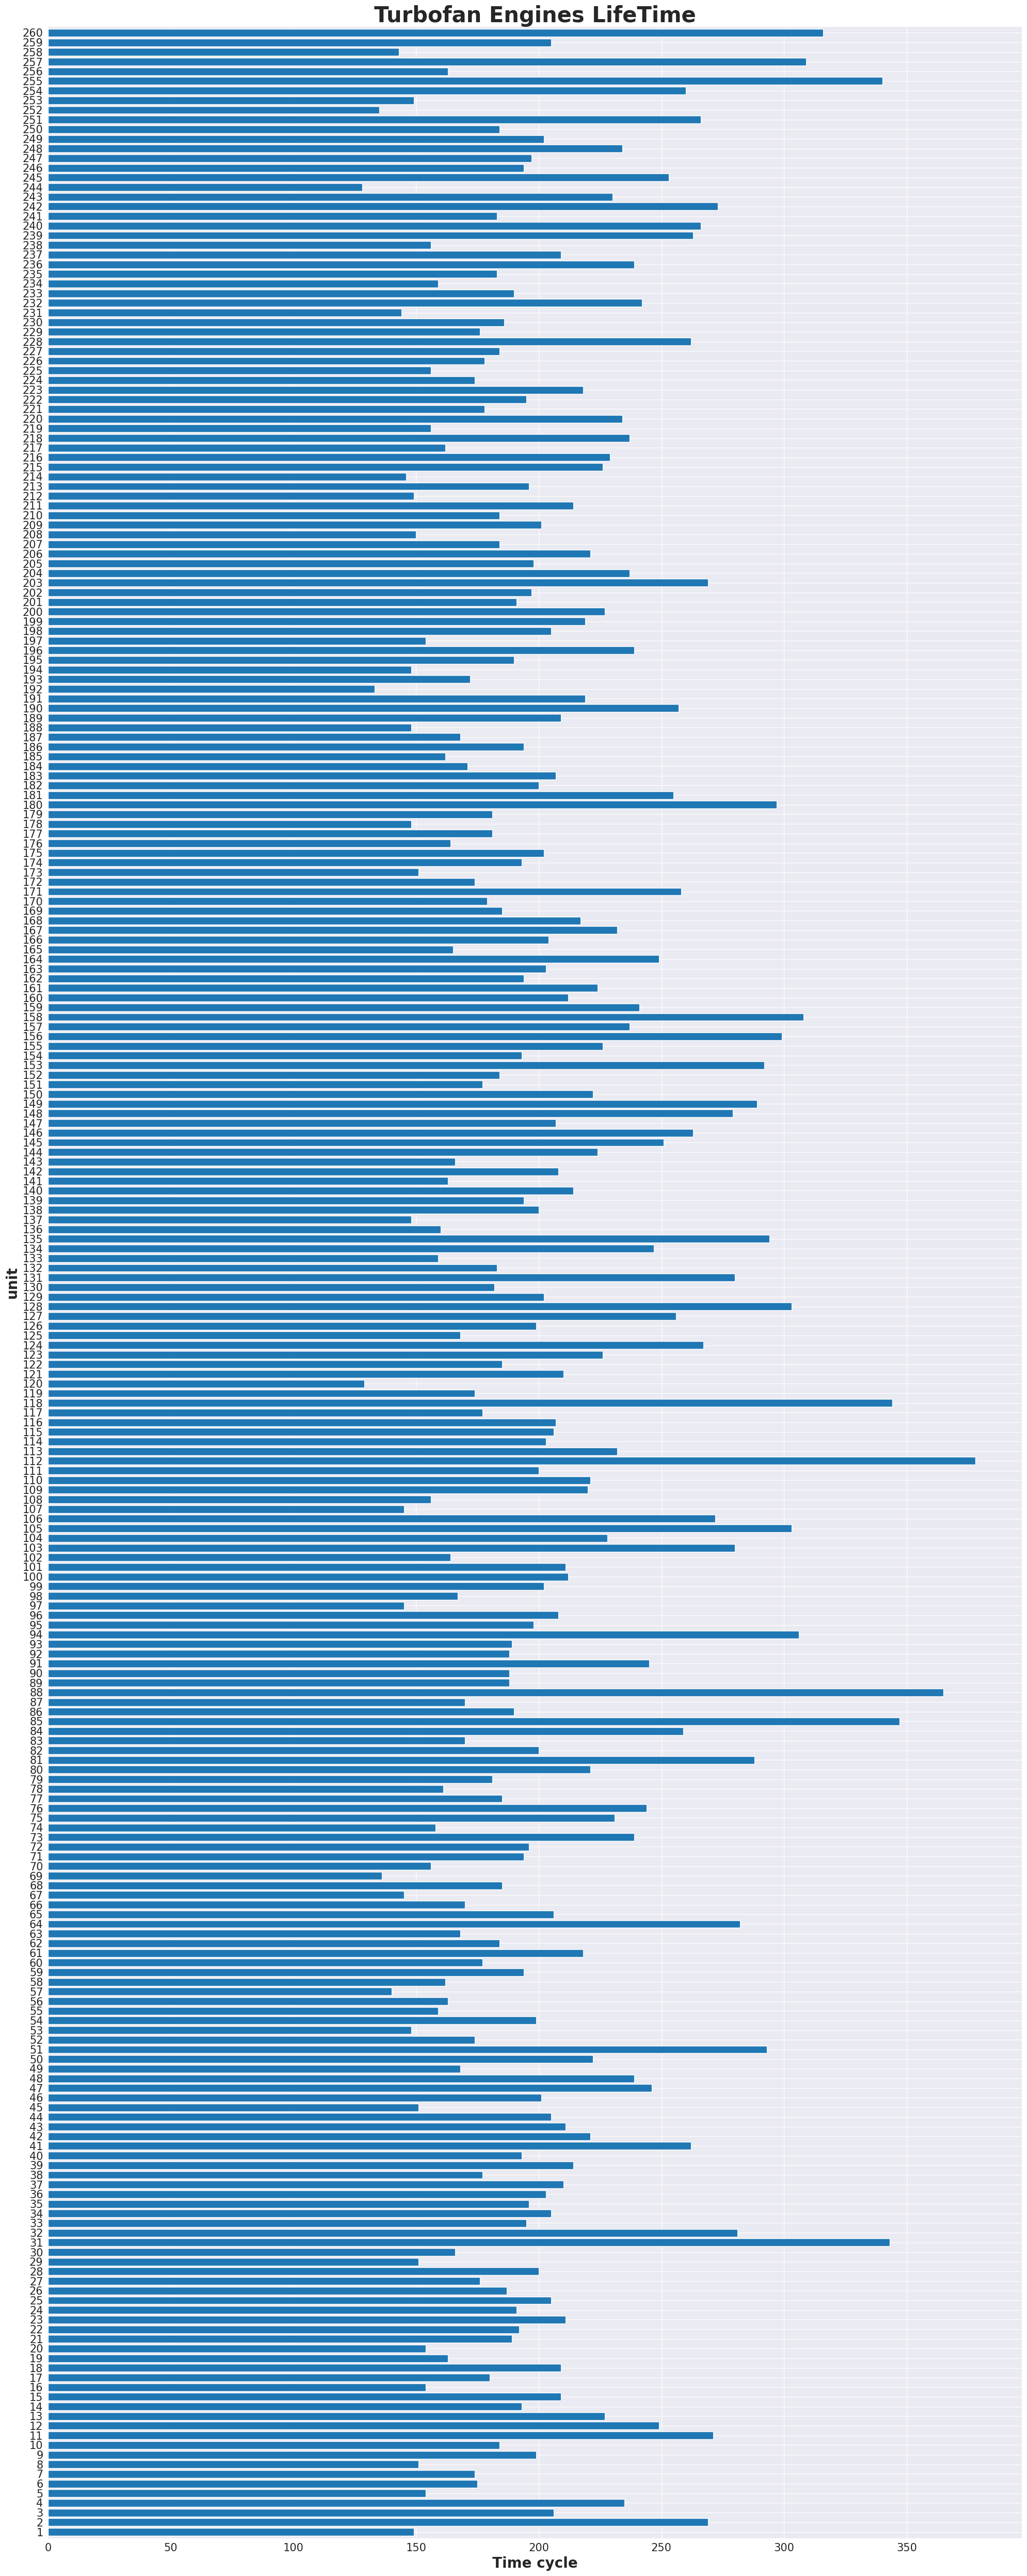

In [ ]:
max_time_cycles=train[index_names].groupby('unit_number').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444459, 'max time cycle')

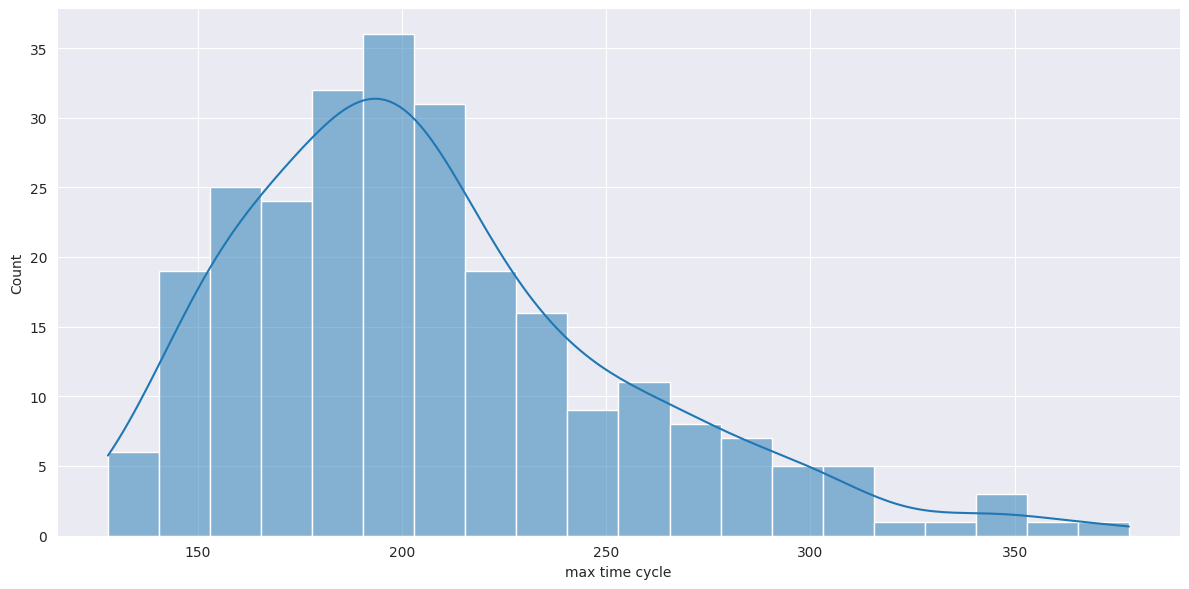

In [ ]:
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

In [ ]:
#Add RUL column to the data
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number')
    max_time_cycles = train_grouped_by_unit['time_cycles'].max()
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

In [ ]:
train = add_RUL_column(train)

In [ ]:
train[['unit_number','RUL']]

,unit_number,RUL
0,1,148
1,1,147
2,1,146
3,1,145
4,1,144
...,...,...
53754,260,4
53755,260,3
53756,260,2
53757,260,1


In [ ]:
#Rul analysis
maxrul_u = train.groupby('unit_number').max().reset_index()
maxrul_u.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,149,42.0077,0.8419,100.0,518.67,643.73,1607.03,1429.43,14.62,...,2388.43,8128.64,10.9764,0.03,397,2388,100.0,39.04,23.3464,148
1,2,269,42.0076,0.8420,100.0,518.67,643.87,1602.29,1427.57,14.62,...,2388.53,8161.78,11.0400,0.03,397,2388,100.0,39.07,23.4306,268
2,3,206,42.0075,0.8420,100.0,518.67,644.04,1603.90,1425.68,14.62,...,2388.36,8145.24,11.0174,0.03,397,2388,100.0,39.11,23.4735,205
3,4,235,42.0079,0.8419,100.0,518.67,644.38,1609.27,1428.21,14.62,...,2389.32,8215.14,11.0346,0.03,397,2388,100.0,39.13,23.4181,234
4,5,154,42.0071,0.8420,100.0,518.67,643.29,1601.04,1423.44,14.62,...,2389.25,8188.34,11.0547,0.03,396,2388,100.0,39.09,23.4725,153


<Axes: >

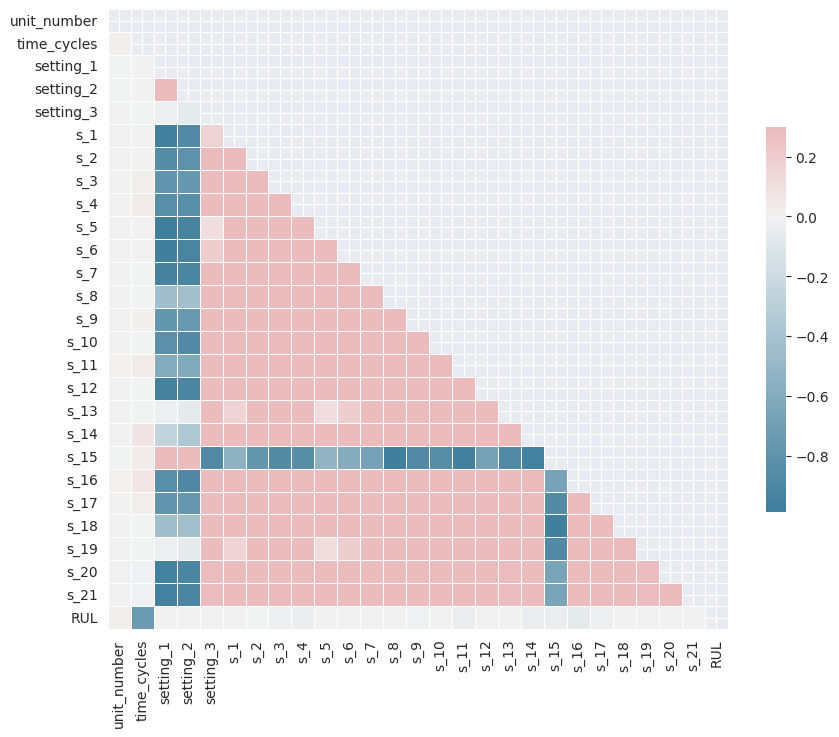

In [ ]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary

{'s_1': '(Fan inlet temperature) (◦R)',
 's_2': '(LPC outlet temperature) (◦R)',
 's_3': '(HPC outlet temperature) (◦R)',
 's_4': '(LPT outlet temperature) (◦R)',
 's_5': '(Fan inlet Pressure) (psia)',
 's_6': '(bypass-duct pressure) (psia)',
 's_7': '(HPC outlet pressure) (psia)',
 's_8': '(Physical fan speed) (rpm)',
 's_9': '(Physical core speed) (rpm)',
 's_10': '(Engine pressure ratio(P50/P2)',
 's_11': '(HPC outlet Static pressure) (psia)',
 's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's_13': '(Corrected fan speed) (rpm)',
 's_14': '(Corrected core speed) (rpm)',
 's_15': '(Bypass Ratio) ',
 's_16': '(Burner fuel-air ratio)',
 's_17': '(Bleed Enthalpy)',
 's_18': '(Required fan speed)',
 's_19': '(Required fan conversion speed)',
 's_20': '(High-pressure turbines Cool air flow)',
 's_21': '(Low-pressure turbines Cool air flow)'}

In [ ]:
def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic[signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.show()

In [ ]:
for i in range(1,22):
    try:
        plot_signal(train, Sensor_dictionary,'s_'+str(i))
    except:
        pass

Output hidden; open in https://colab.research.google.com to view.

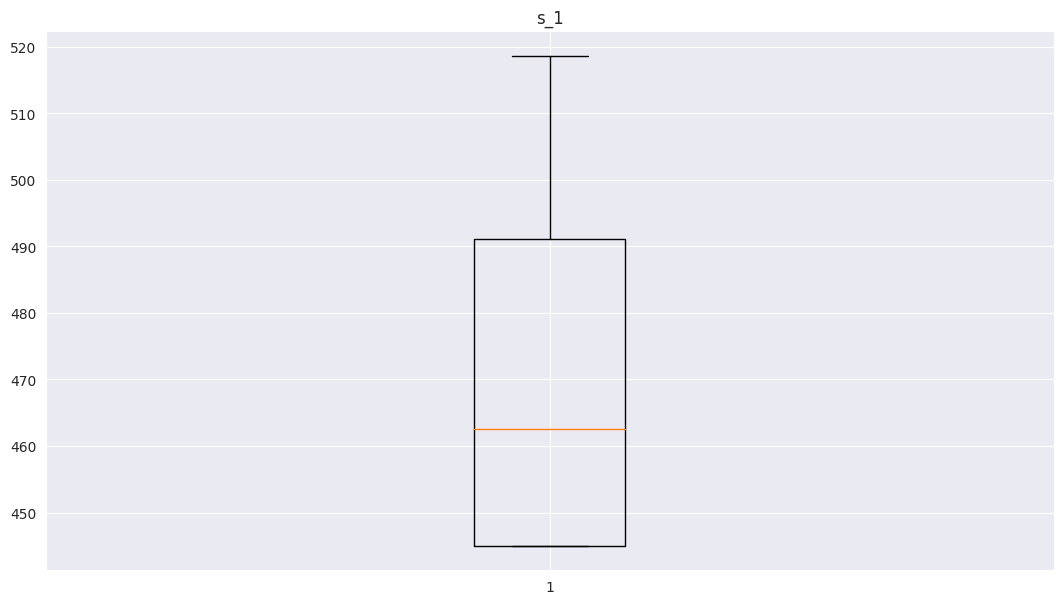

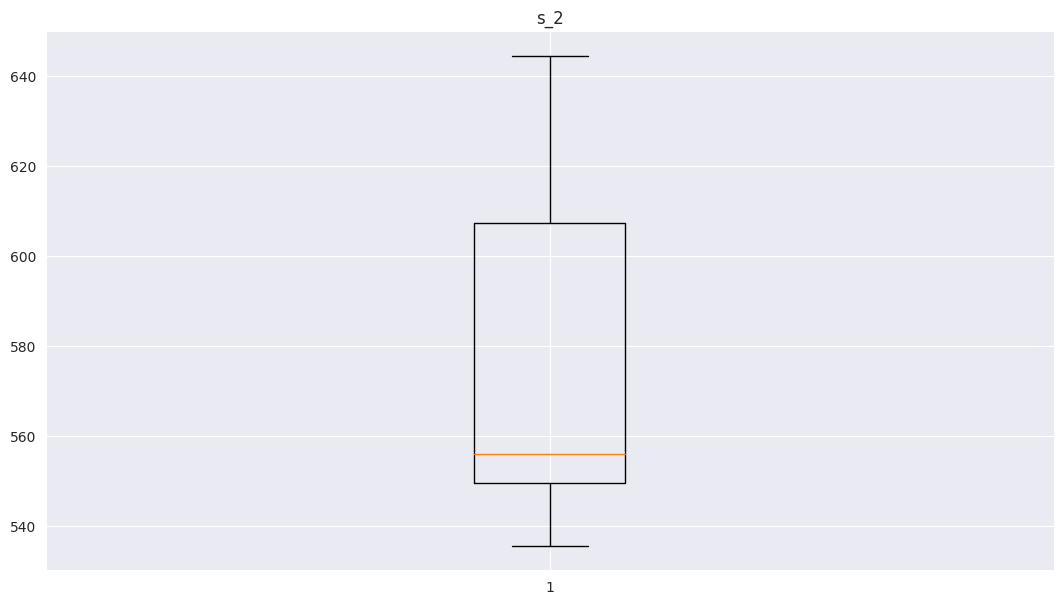

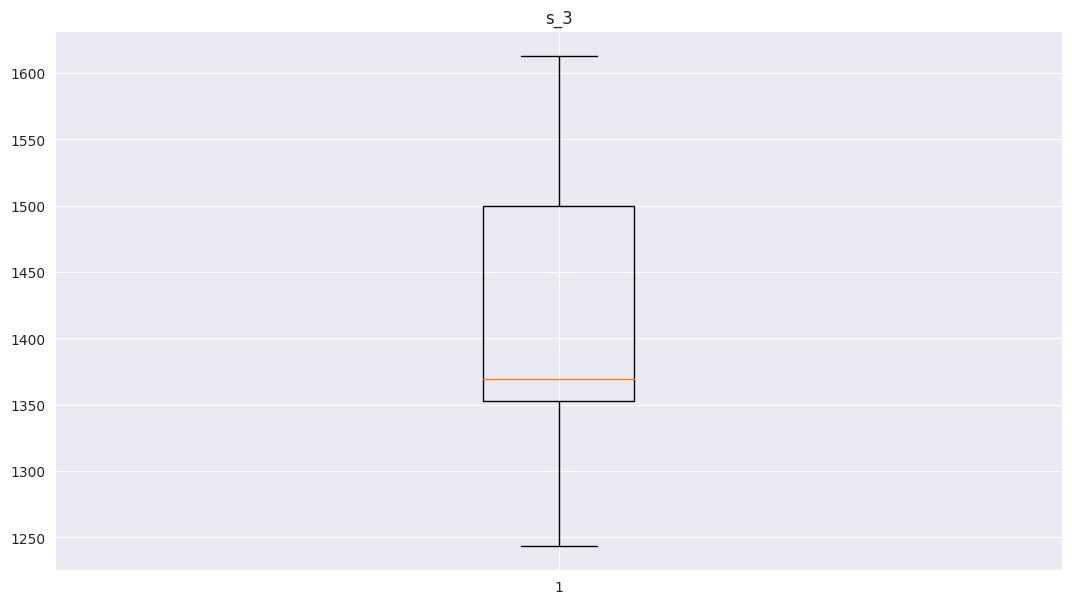

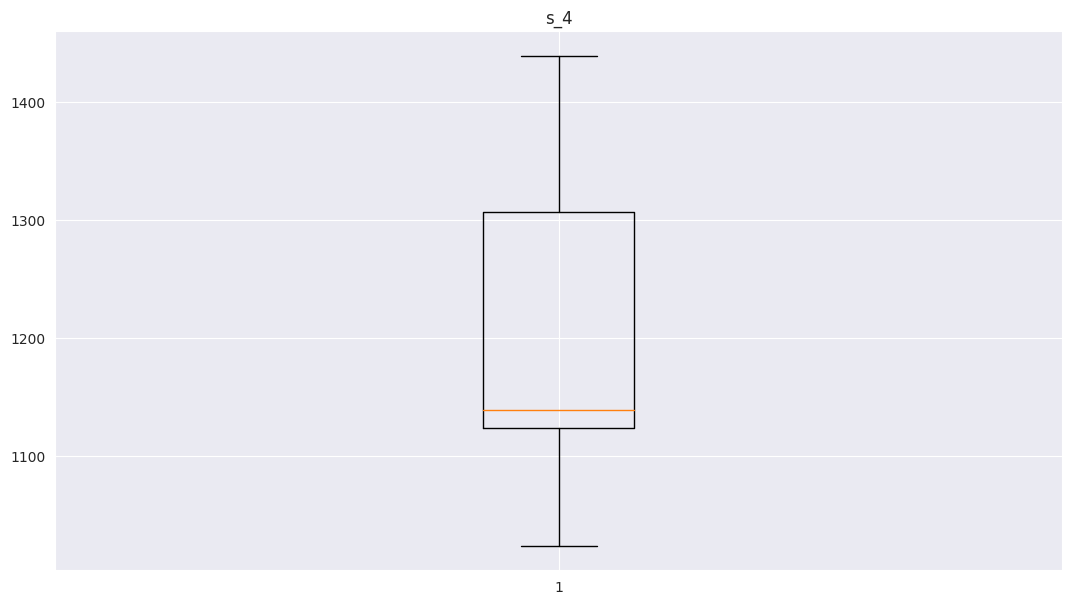

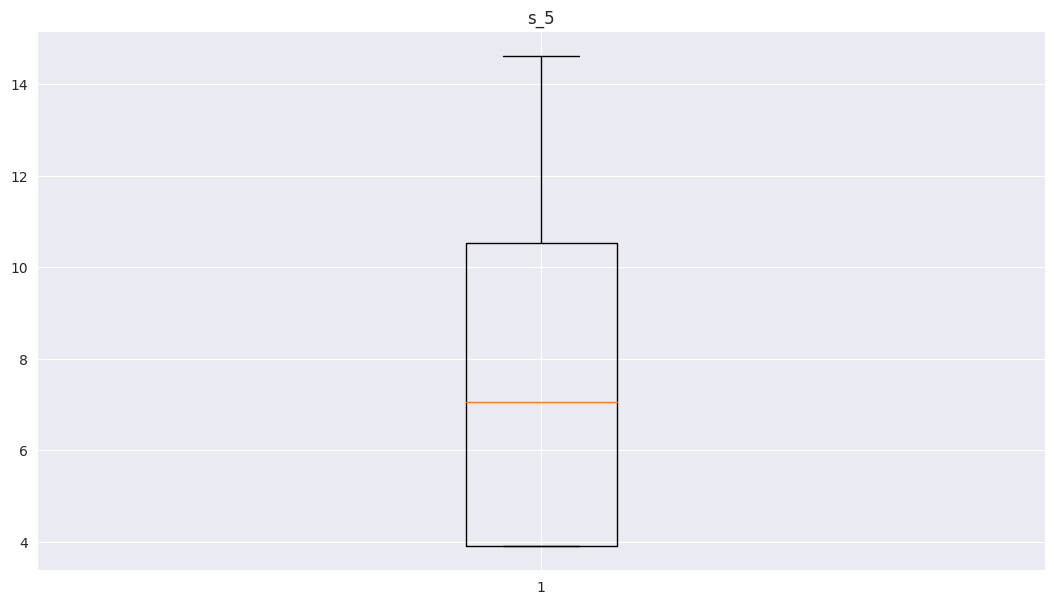

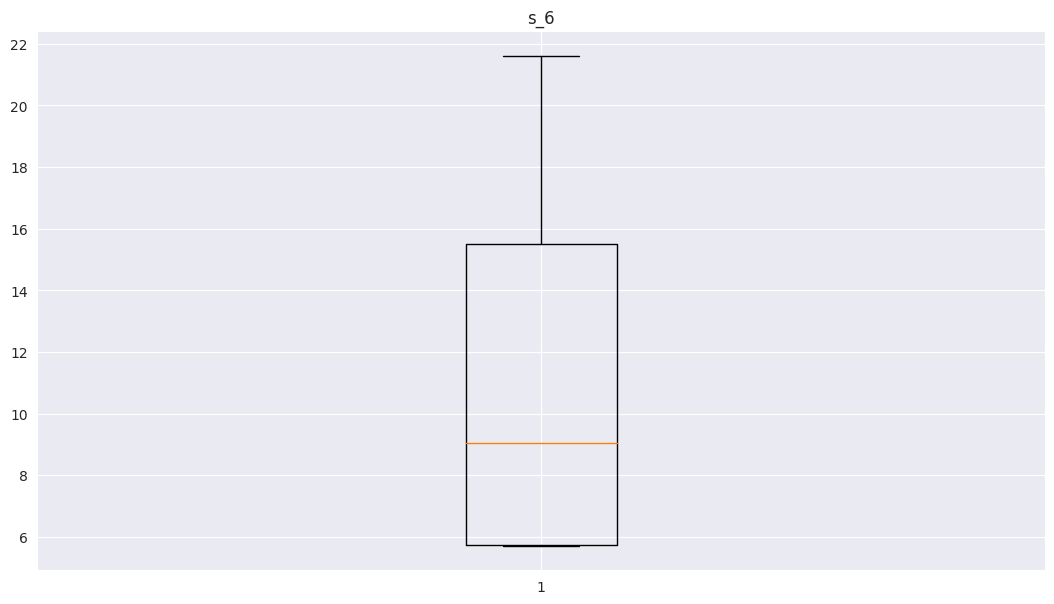

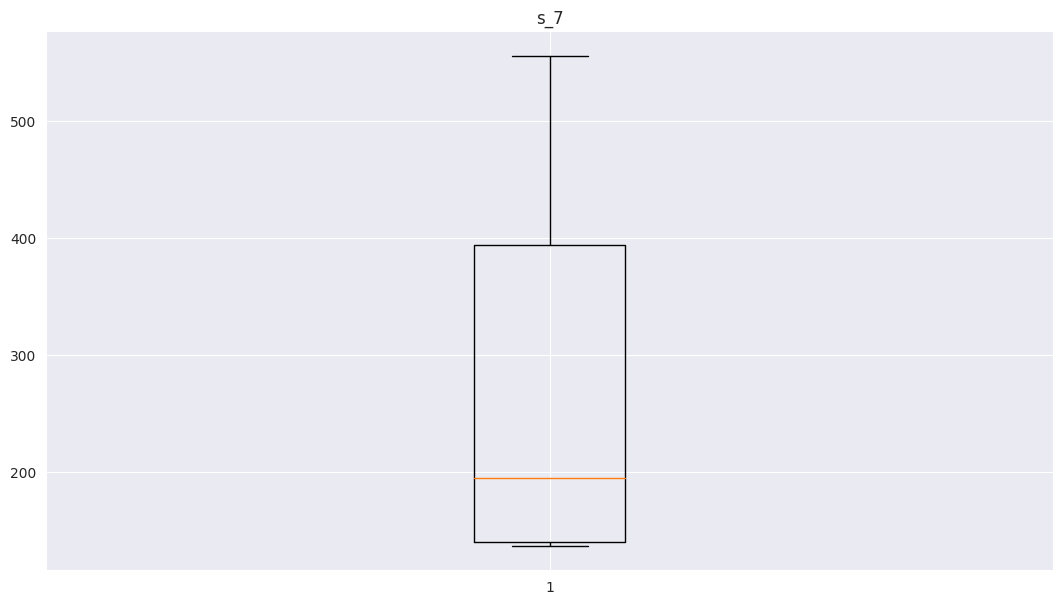

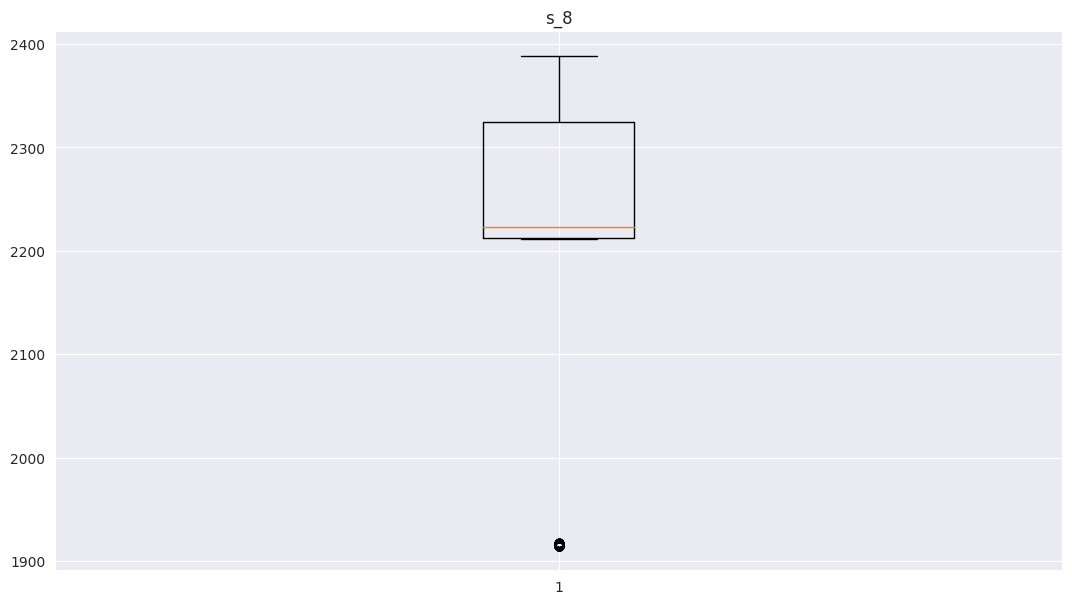

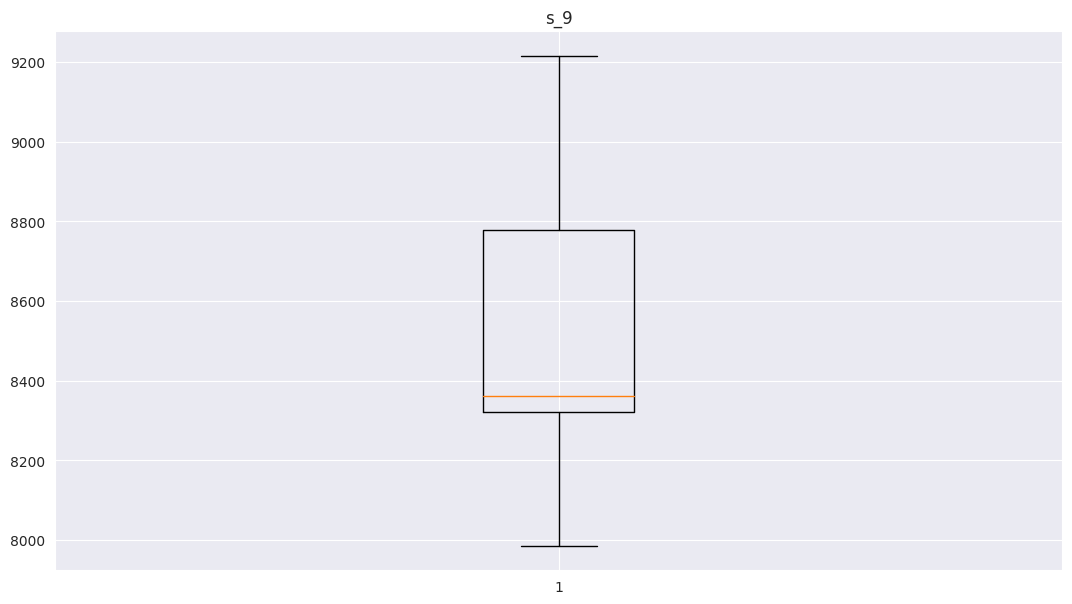

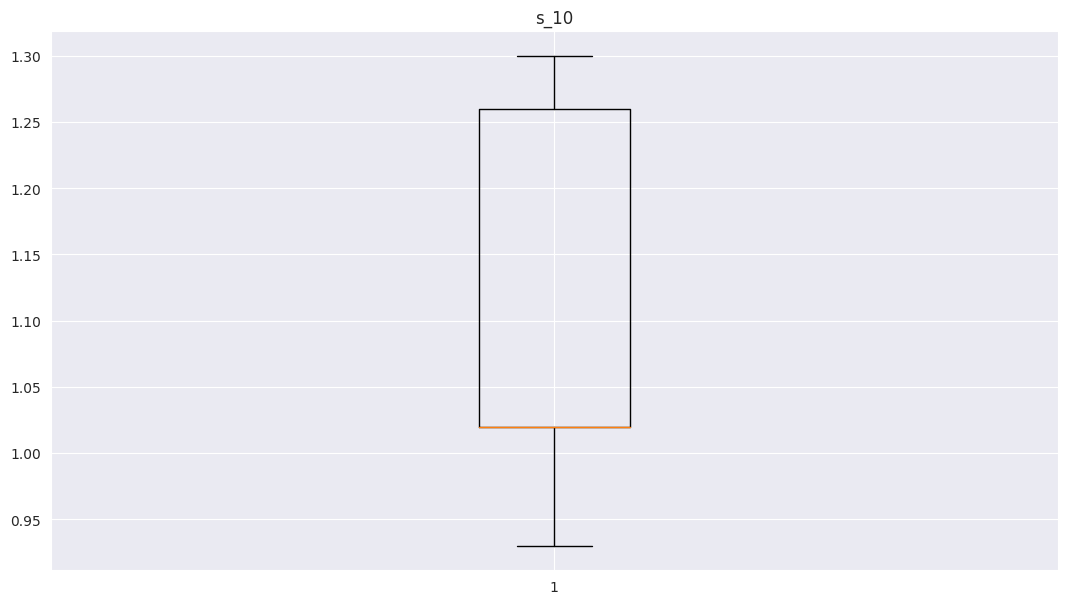

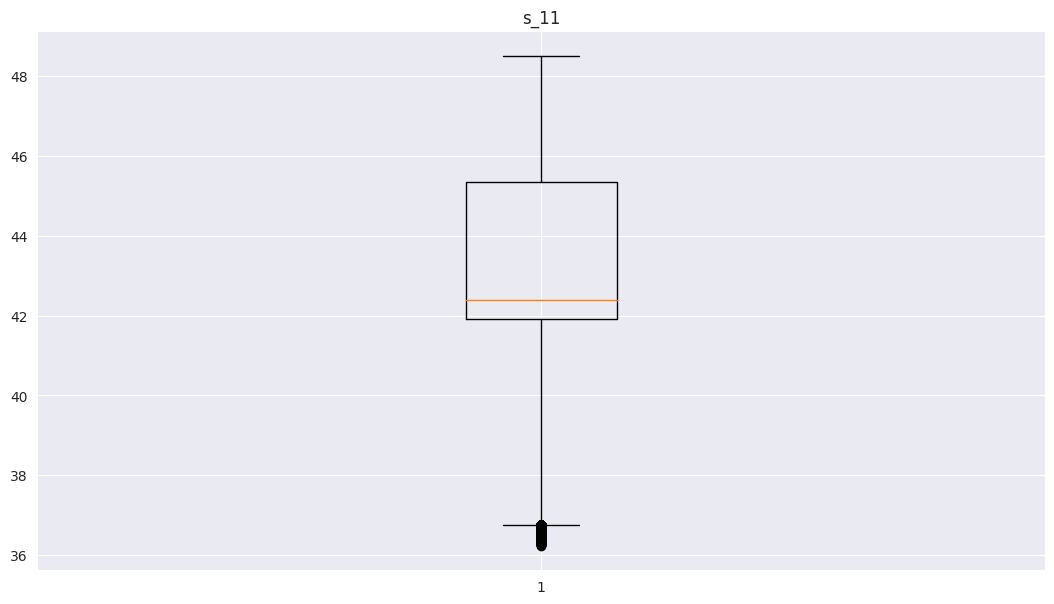

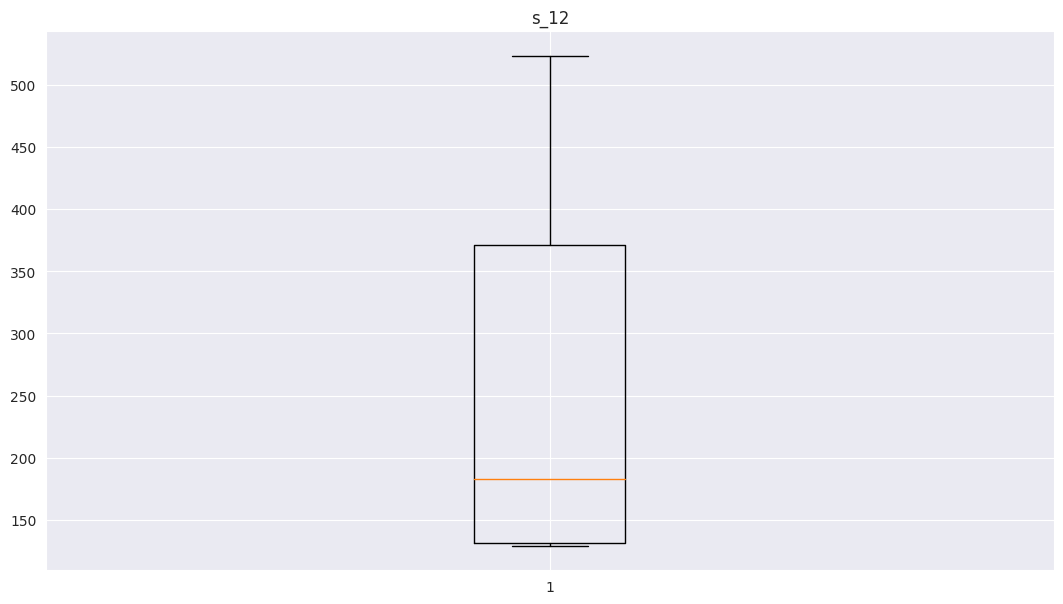

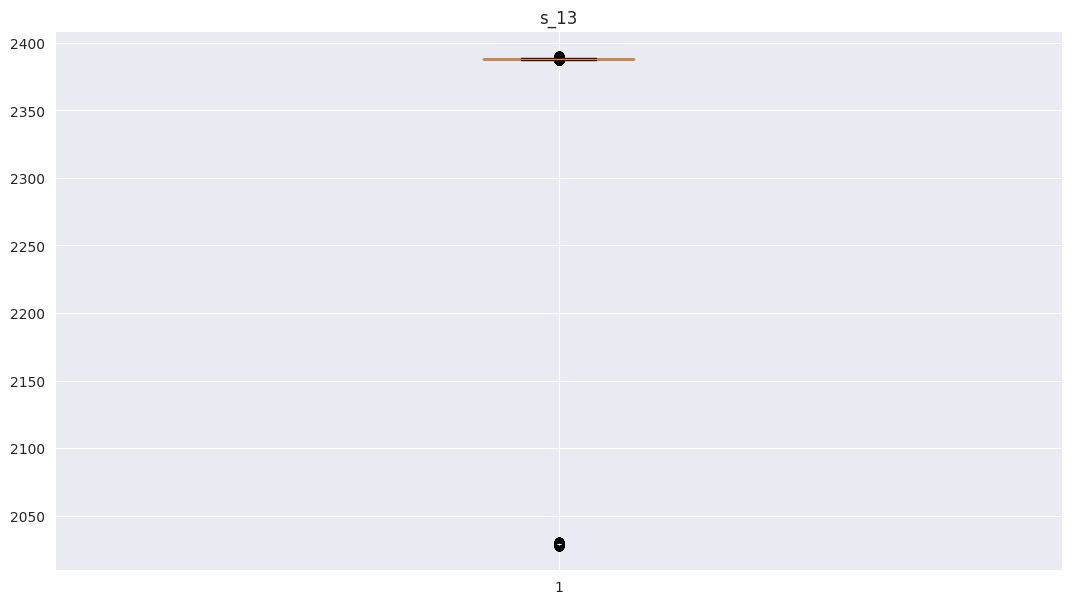

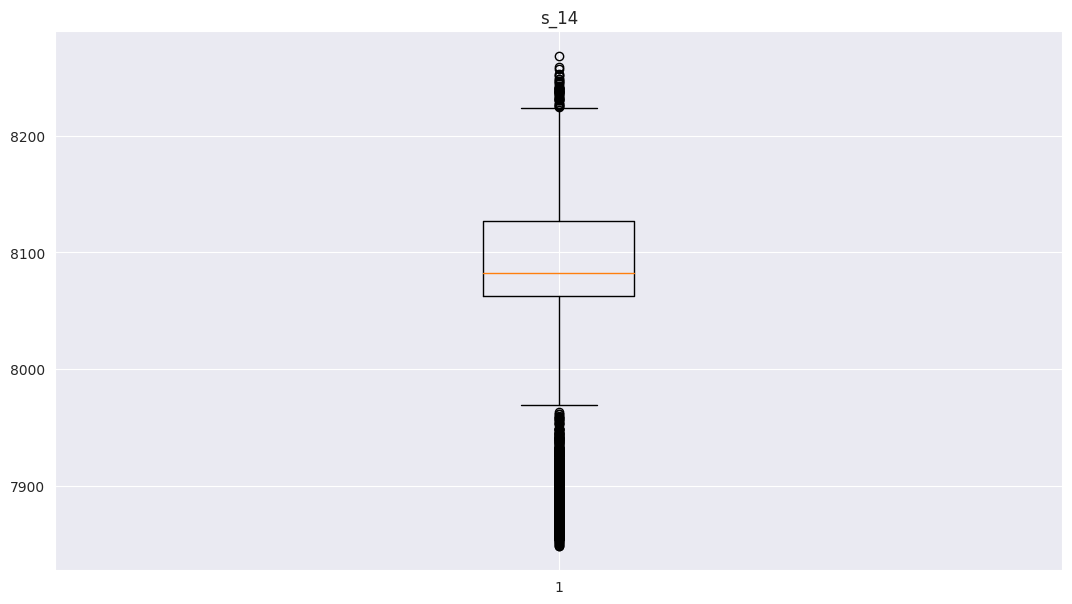

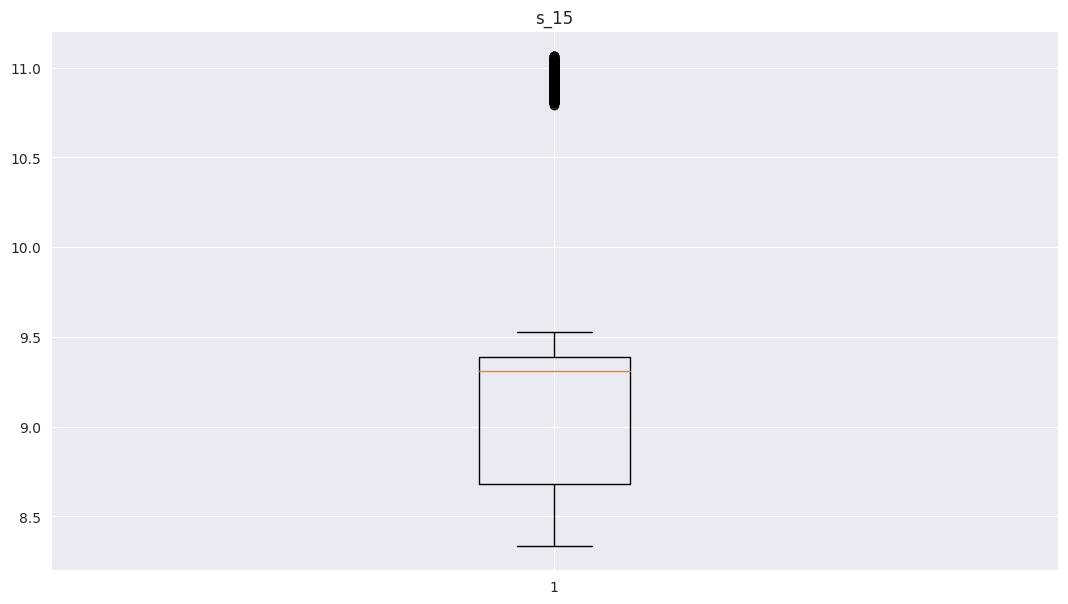

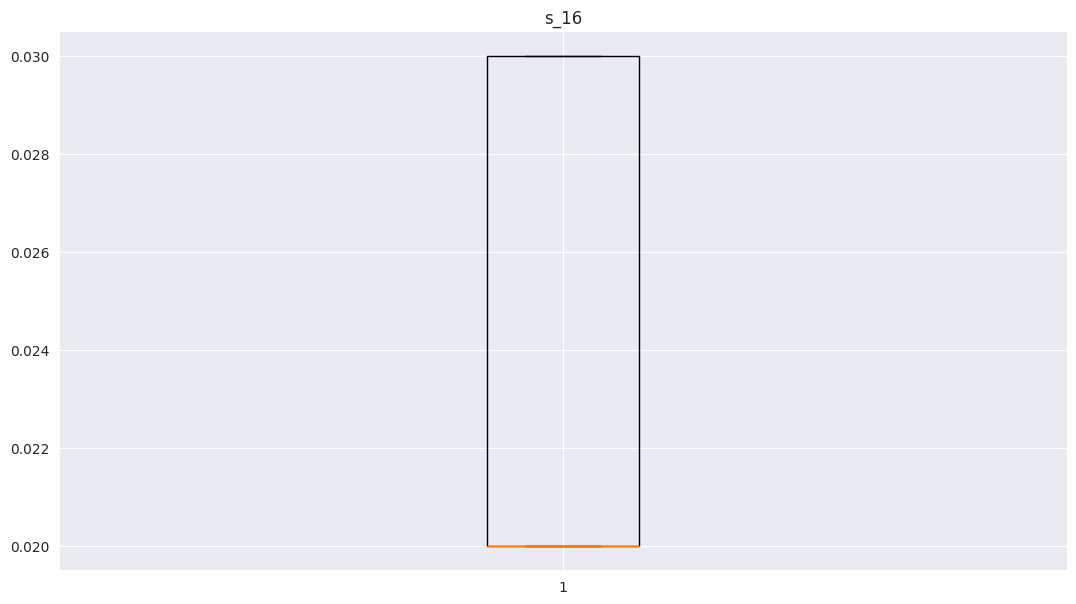

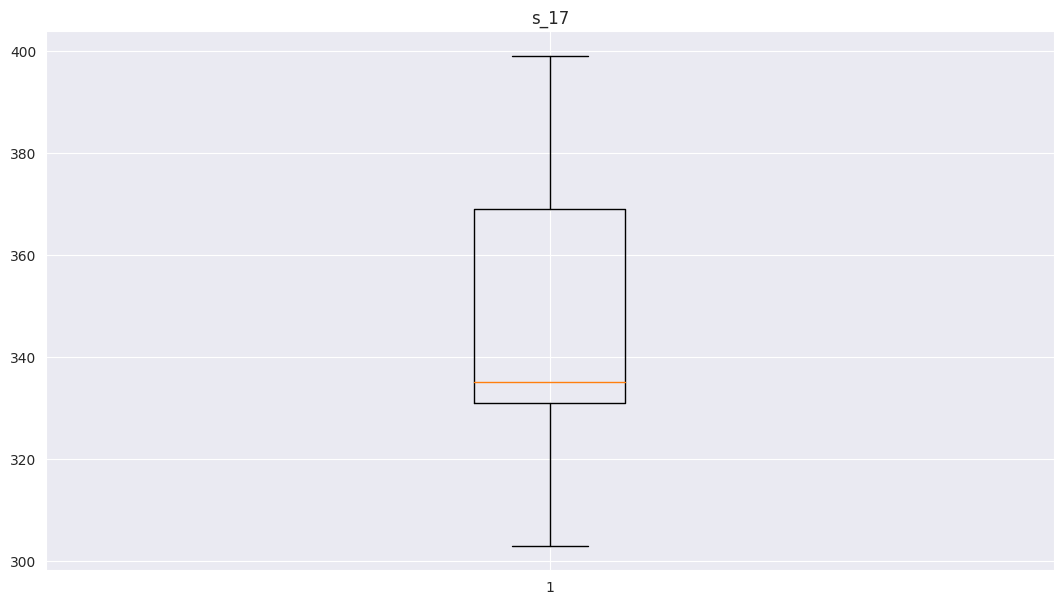

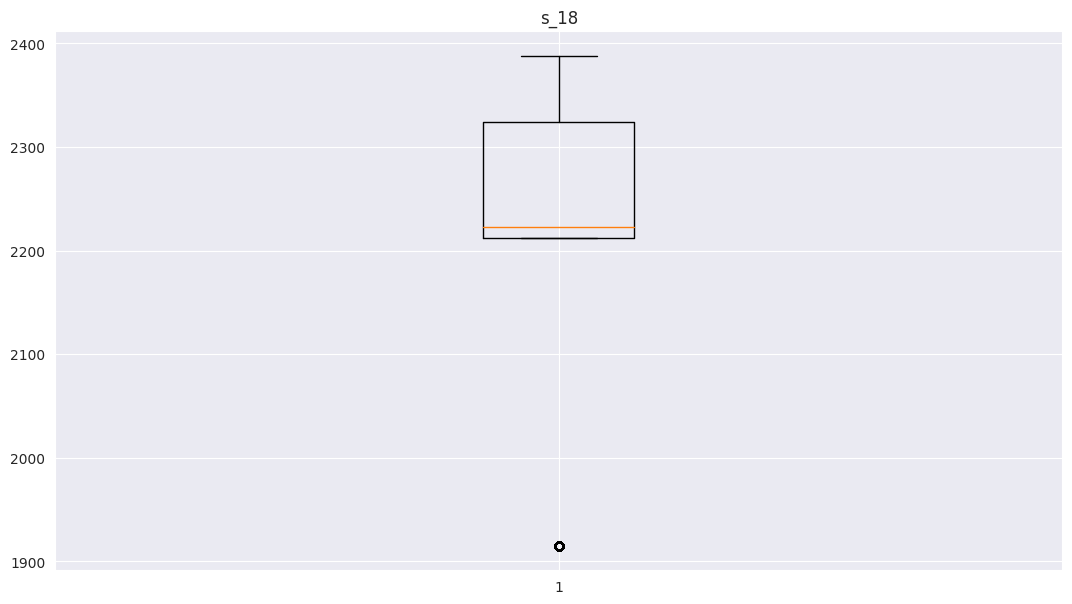

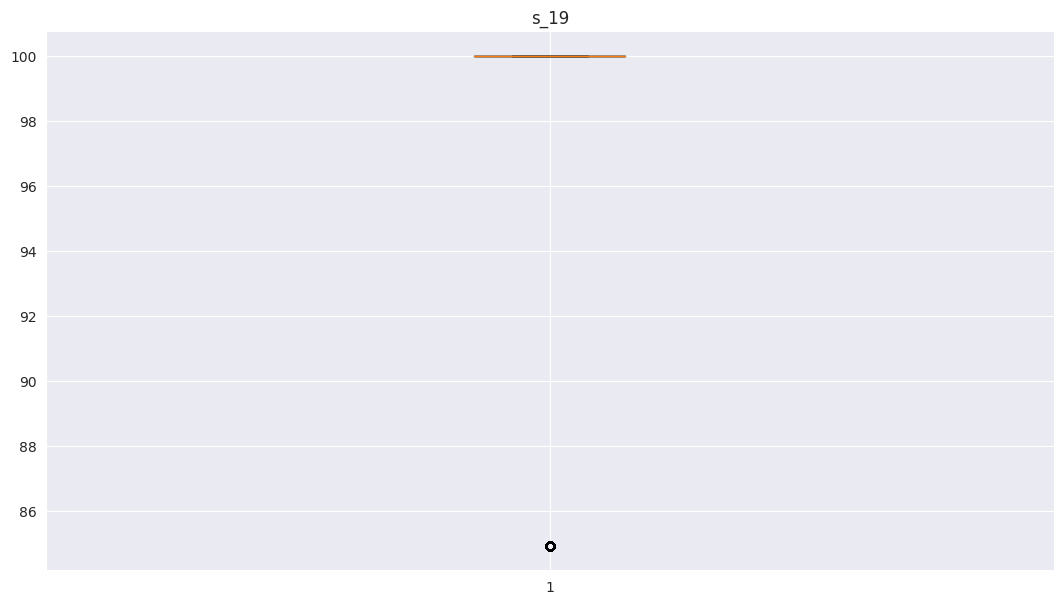

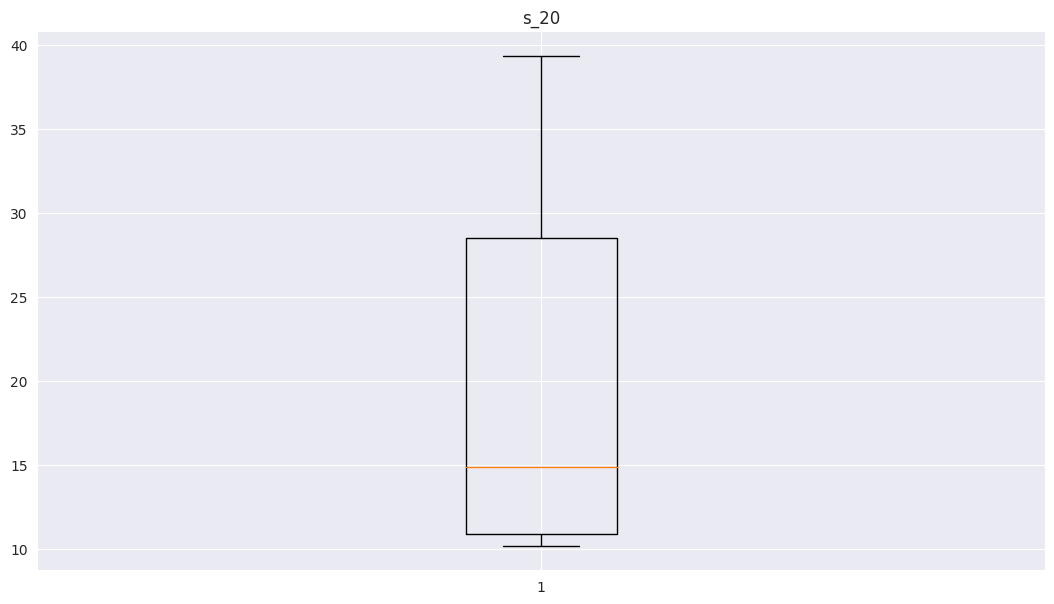

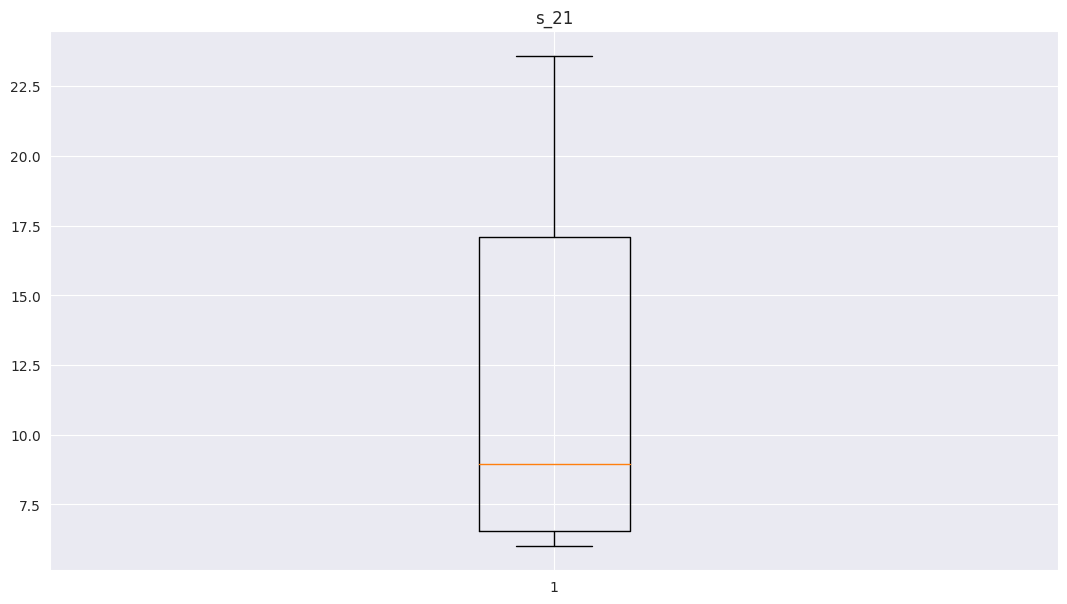

In [ ]:
for x in sensor_names:
    plt.figure(figsize=(13,7))
    plt.boxplot(train[x])
    plt.title(x)
    plt.show()

In [ ]:
train.loc[:,'s_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,53759.0,472.910207,26.389707,445.0000,445.0000,462.5400,491.1900,518.6700
s_2,53759.0,579.672399,37.289399,535.5300,549.5700,555.9800,607.3400,644.5200
s_3,53759.0,1419.971013,105.946341,1243.7300,1352.7600,1369.1800,1499.3700,1612.8800
s_4,53759.0,1205.442024,119.123428,1023.7700,1123.6550,1138.8900,1306.8500,1439.2300
s_5,53759.0,8.031986,3.613839,3.9100,3.9100,7.0500,10.5200,14.6200
s_6,53759.0,11.600746,5.431802,5.7100,5.7200,9.0300,15.4900,21.6100
s_7,53759.0,282.606787,146.005306,136.8000,139.9350,194.6600,394.0800,555.8200
s_8,53759.0,2228.879188,145.209816,1914.7700,2211.8800,2223.0700,2323.9600,2388.3900
s_9,53759.0,8525.200837,335.812013,7985.5600,8321.6600,8361.2000,8778.0300,9215.6600
s_10,53759.0,1.094962,0.127469,0.9300,1.0200,1.0200,1.2600,1.3000


In [ ]:
from sklearn.model_selection import train_test_split
drop_labels = index_names+setting_names
X_train=train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Droping the target variable
X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)
#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
#Conserve only the last occurence of each unit to match the length of y_valid
X_valid = valid.groupby('unit_number').last().reset_index().drop(columns=drop_labels)
#scaling X_valid
X_valid_s=scaler.fit_transform(X_valid)

array([[<Axes: title={'center': 's_2'}>, <Axes: title={'center': 's_3'}>,
        <Axes: title={'center': 's_4'}>, <Axes: title={'center': 's_7'}>],
       [<Axes: title={'center': 's_8'}>, <Axes: title={'center': 's_9'}>,
        <Axes: title={'center': 's_11'}>,
        <Axes: title={'center': 's_12'}>],
       [<Axes: title={'center': 's_13'}>,
        <Axes: title={'center': 's_14'}>,
        <Axes: title={'center': 's_15'}>,
        <Axes: title={'center': 's_17'}>],
       [<Axes: title={'center': 's_20'}>,
        <Axes: title={'center': 's_21'}>, <Axes: >, <Axes: >]],
      dtype=object)

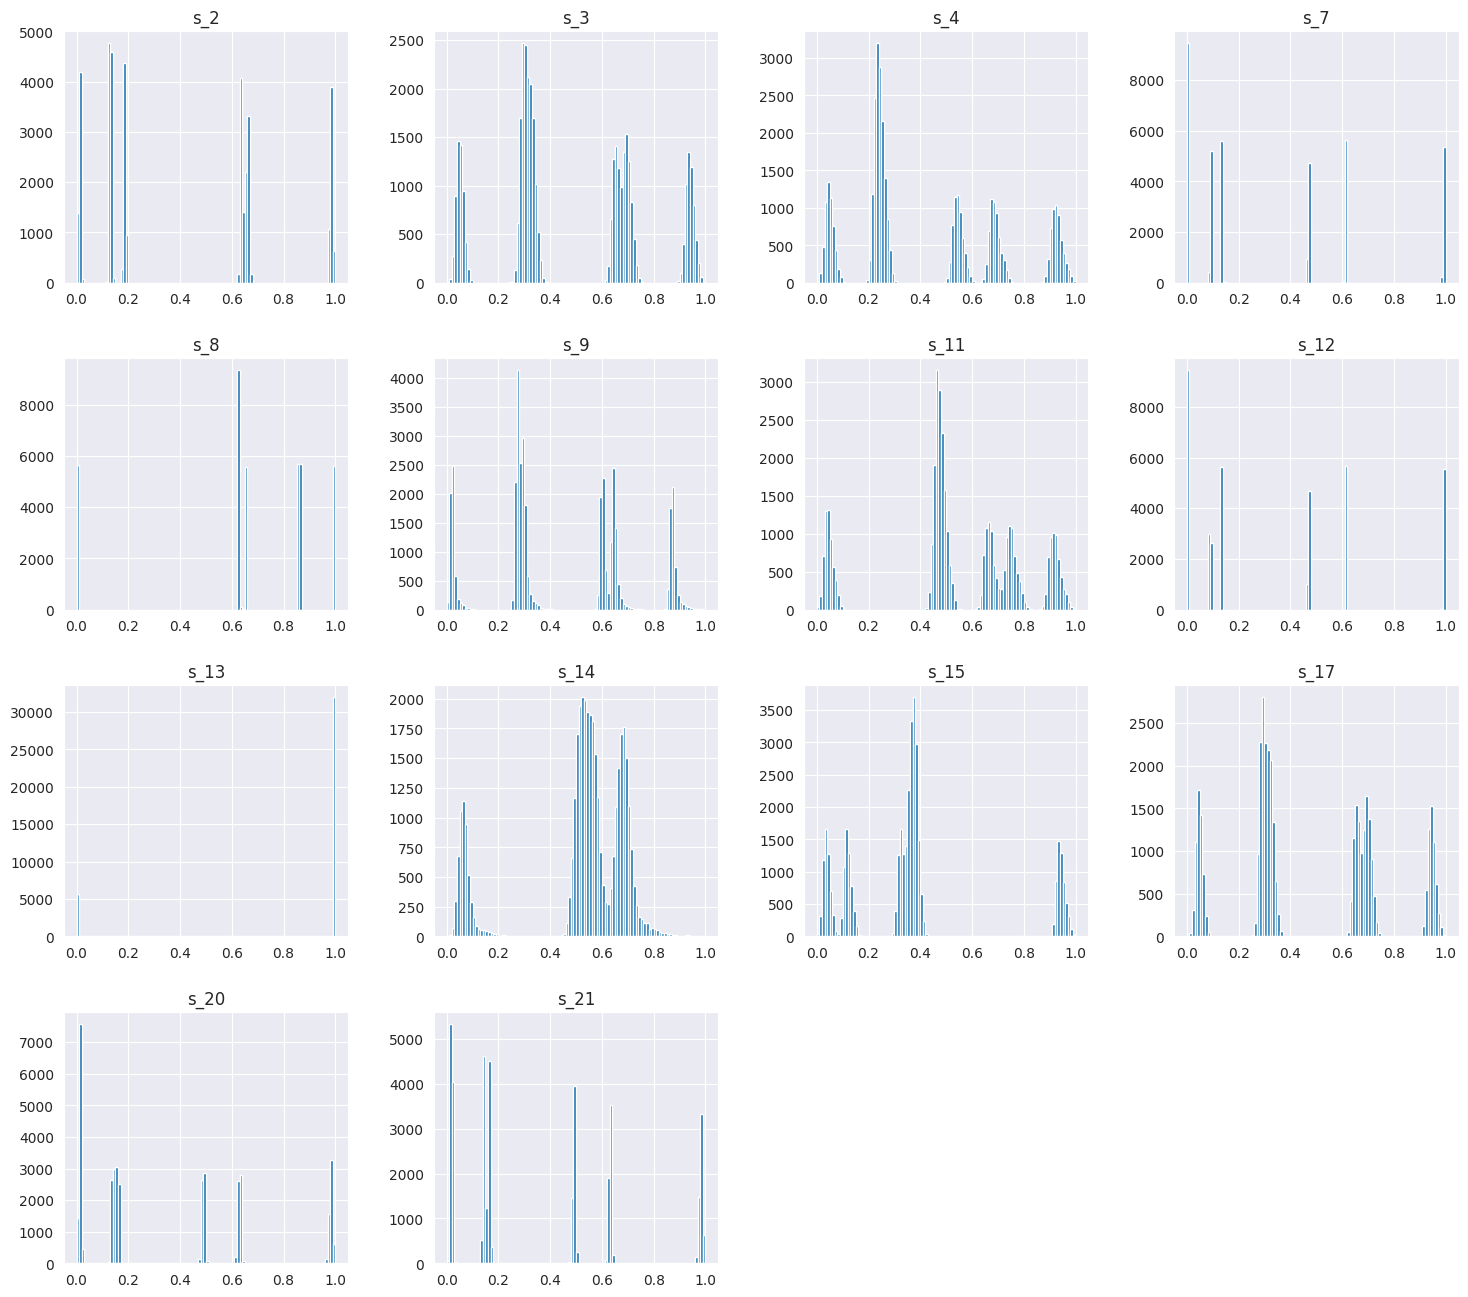

In [ ]:
sensor_names=['s_{}'.format(i) for i in range(1,22) if i not in [1,5,6,10,16,18,19]]
pd.DataFrame(X_train_s,columns=['s_{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=100, figsize=(18,16))

#First Attempt Without removing useless sensors



In [ ]:
#Linear regression
class Linear_Regression() :
    def __init__( self, lr=0.01, iterations=150 ) :
        self.lr = lr
        self.iterations = iterations
    def fit( self, X, Y ) :
        self.l, self.p = X.shape
        # weight initializer
        self.W = np.zeros( self.p )
        self.b = 0
        self.X = X
        self.Y = Y
        # gradientlearning
        for i in range( self.iterations ) :
            self.weight_updater()
        return self

    def weight_updater( self ) :
        Y_pred = self.predict( self.X )
        #  gradients
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.l
        db = - 2 * np.sum( self.Y - Y_pred ) / self.l
        # new weights assigned
        self.b = self.b - self.lr * db
        self.W = self.W - self.lr * dW
        return self

    def predict( self, X ) :
          # Y_pr=X.W+b
        return X.dot( self.W ) + self.b

In [ ]:
#SVR

from sklearn.svm import SVR
import tensorflow as tf
regressor = SVR(kernel='rbf')

In [ ]:
# Random forest

rf = RandomForestRegressor(max_features="sqrt", random_state=42)

In [ ]:
#Defining evaluation functions

#R2 score & RMSE & MAER
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [ ]:
#plot real data and the predicted one to make some comparison
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

In [ ]:
# 1st attempt (all features, without historical data)

lr=Linear_Regression() #Instantiation
lr.fit(X=X_train_s, Y=y_train) #Fitting

y_lr_train = lr.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_s)  #Prediction on test data
evaluate(y_test, y_lr_test, label='test')

y_lr_valid= lr.predict(X_valid_s) #Prediction on validation data
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:70.85918090885541, R2:-0.04252780264708411
test set RMSE:70.19140673385861, R2:-0.044921773621084515
valid set RMSE:60.895130175328944, R2:-0.2821623081685254


In [ ]:
#SVM

regressor.fit(X_train_s, y_train) # fitting

y_svr_train = regressor.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_s) #Prediction on test data
evaluate(y_test, y_svr_test, label='test')

y_svr_valid= lr.predict(X_valid_s)  #Prediction on validation data
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:63.09862595613699, R2:0.1733242571644713
test set RMSE:62.70269619507129, R2:0.16614926159955923
valid set RMSE:60.895130175328944, R2:-0.2821623081685254


In [ ]:
#Random Forest Regressor

# gridsearch goes here
rf.fit(X_train_s, y_train)
# predict and evaluate
y_rf_train = rf.predict(X_train_s)
evaluate(y_train,y_rf_train, label='train')

y_rf_test = rf.predict(X_test_s)
evaluate(y_test, y_rf_test, label='test')

y_rf_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_rf_valid, label='valid')

train set RMSE:16.070027390622634, R2:0.9463797759773163
test set RMSE:54.75183460354655, R2:0.36421066582919304
valid set RMSE:41.703903782902515, R2:0.39864448360507676


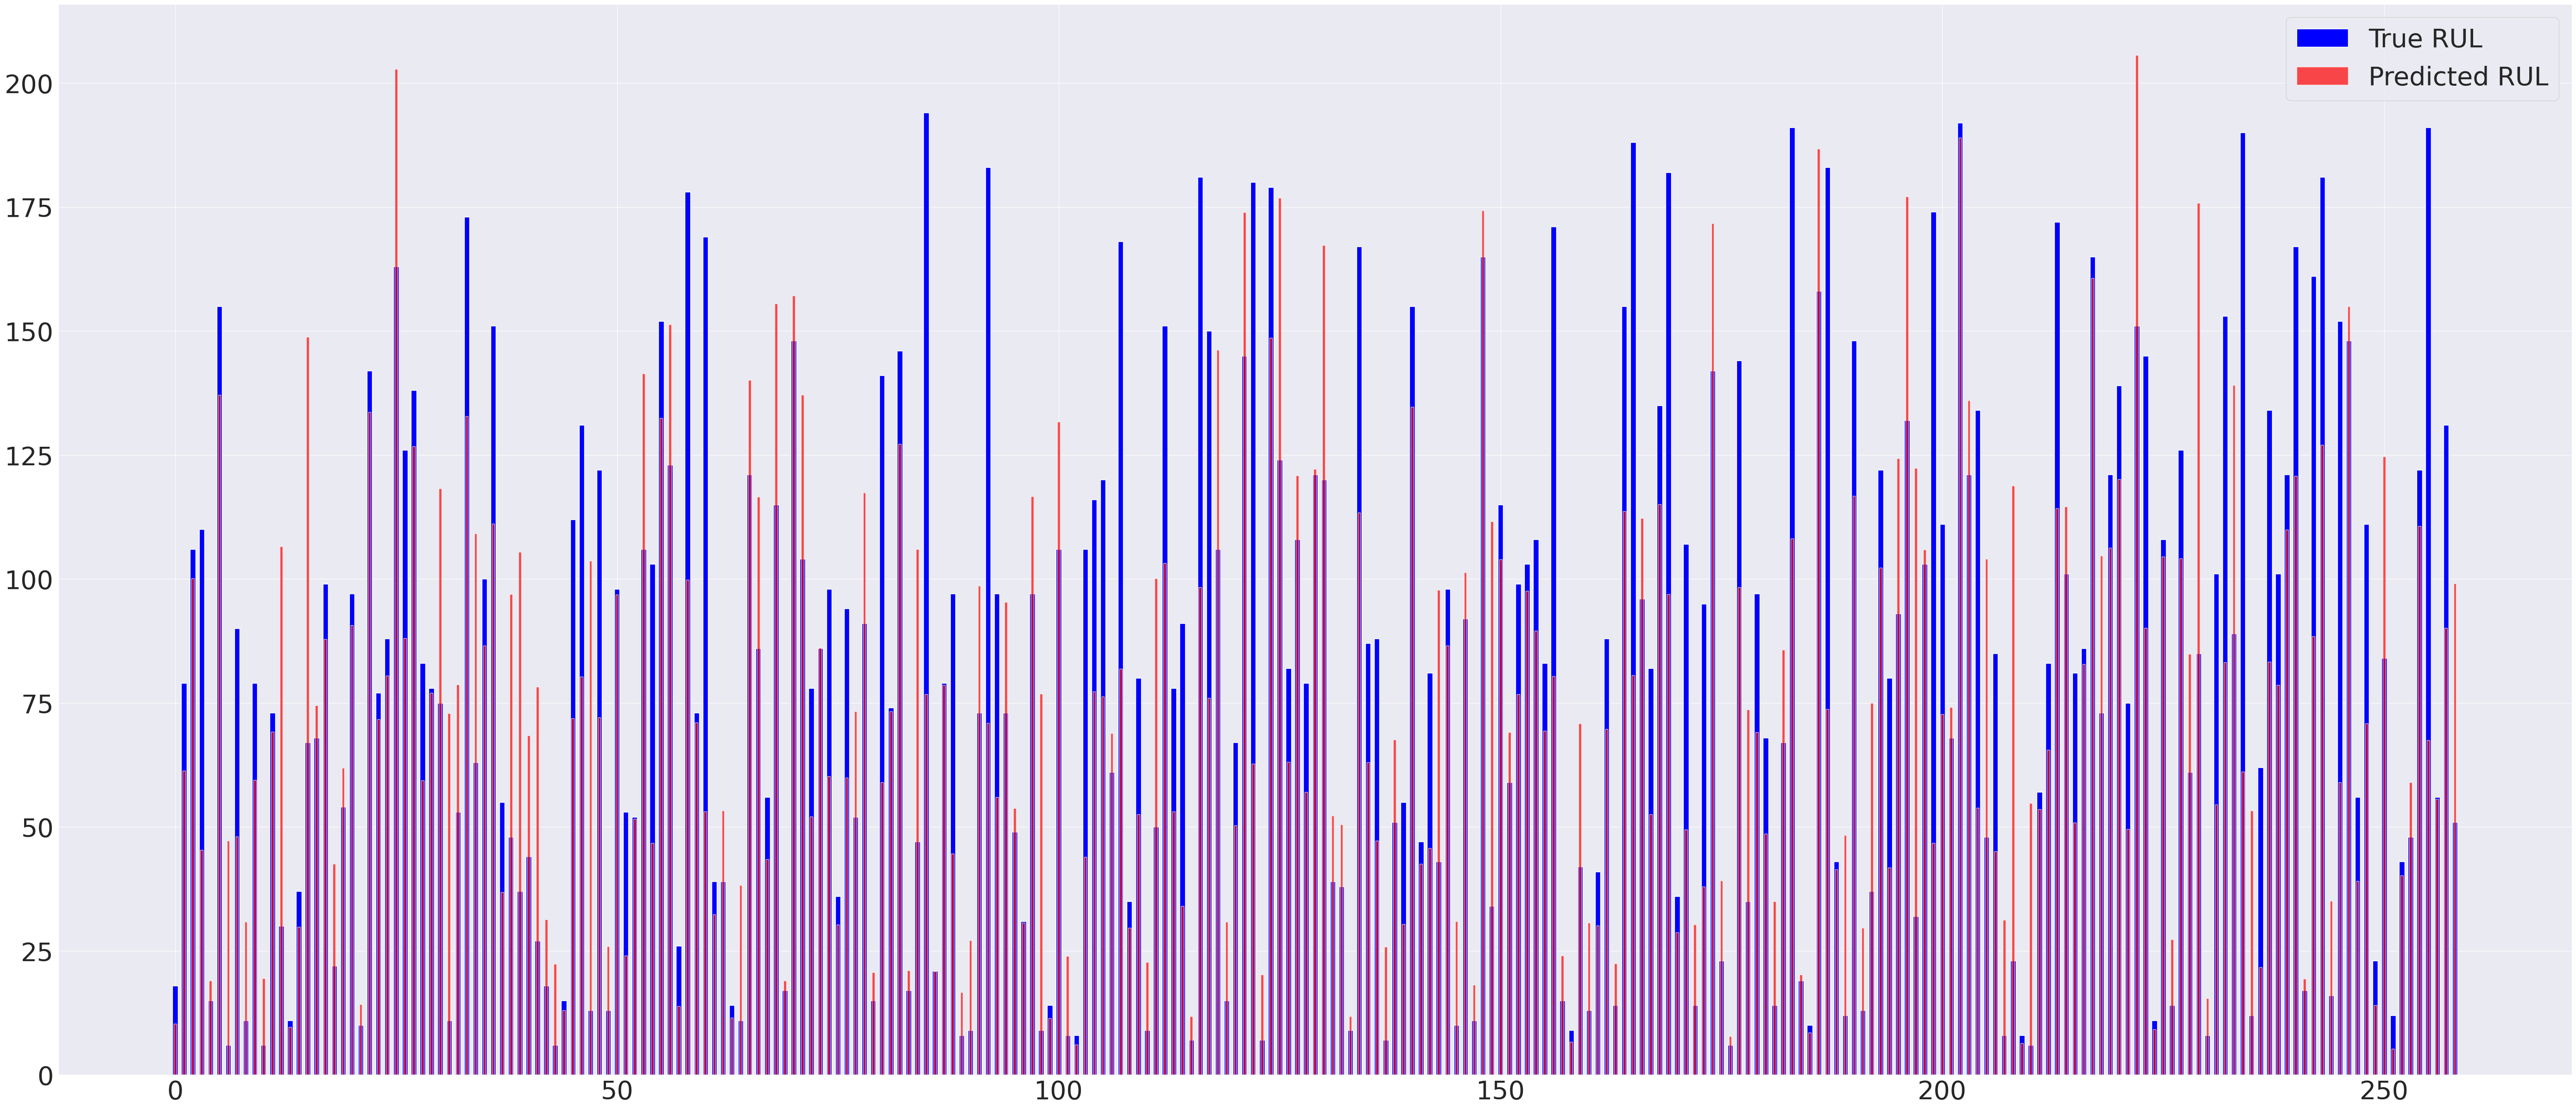

In [ ]:
plot_predActual(y_valid, y_rf_valid)

#Second Attempt With Useless Sensors
#### In this section we drop constant signals, and we noticed in the max_time_cycles plot that in most of the time the maximum value is in the interval [190,210], hence we will set the maximum RUL to 195 through RUL clipping, Considering that every RUL higher than 195 is equivalent to 195 will help in the prediction process as it reduces some overhead without affecting the main objective as 195 is already a high RUL.

In [ ]:
print('maximum of y_train : ',y_train.max())
print('maximum of y_test : ',y_test.max())
print('maximum of y_valid : ',y_valid.max())

maximum of y_train :  377
maximum of y_test :  363
maximum of y_valid :  RUL    194
dtype: int64


In [ ]:
#I notice that the model overestimates the RUL

(array([2859., 2794., 2845., 2892., 2333., 1320.,  662.,  289.,   95.,
          39.]),
 array([  0. ,  36.3,  72.6, 108.9, 145.2, 181.5, 217.8, 254.1, 290.4,
        326.7, 363. ]),
 <BarContainer object of 10 artists>)

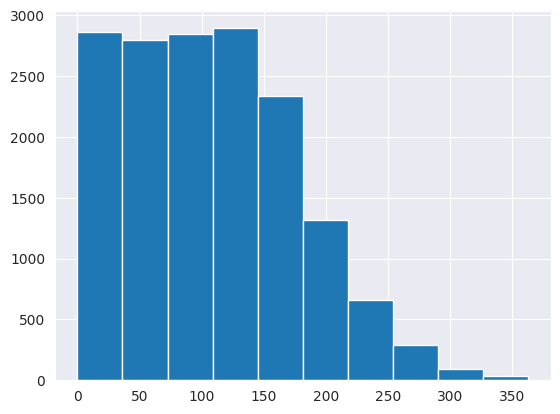

In [ ]:
plt.hist(y_test)

In [ ]:
drop_labels2=['s_1', 's_5','s_6','s_10',  's_16', 's_18', 's_19', 's_11', 's_20', 's_21', 's_15']
X_train_2=X_train.drop(columns=drop_labels2, axis=1) # drop the constant columns from the train dataset
X_test_2=X_test.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the test dataset
X_train_2_s=scaler.fit_transform(X_train_2) #scaling X_train_2
X_test_2_s=scaler.fit_transform(X_test_2) #scaling X_test_2
y_train_clip=y_train.clip(upper=195)  #Clipping y_train to have 195 as the maximum value
X_valid_2=X_valid.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the validation dataset
X_valid_2_s=scaler.fit_transform(X_valid_2) #scaling X_valid_2

In [ ]:
#Linear Regression

lr=Linear_Regression()
lr.fit(X=X_train_2_s, Y=y_train_clip)

y_lr_train = lr.predict(X_train_2_s)
evaluate(y_train_clip,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_2_s)
evaluate(y_test, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_2_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:64.17417123763077, R2:-0.11684090936671154
test set RMSE:72.33981707566699, R2:-0.1098663868228682
valid set RMSE:61.101659807714746, R2:-0.2908741233796299


In [38]:
#SVR
regressor.fit(X_train_2_s, y_train)

y_svr_train = regressor.predict(X_train_2_s)
evaluate(y_train_clip,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_2_s)
evaluate(y_test, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_2_s)
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:54.393615252508404, R2:0.1976448841934174
test set RMSE:63.547677704843416, R2:0.14352388770714164
valid set RMSE:47.21061422920256, R2:0.22935000313762477


In [39]:
#Random Forest

rf.fit(X_train_2_s, y_train_clip)
# predict and evaluate
y_rf_train = rf.predict(X_train_2_s)
evaluate(y_train_clip,y_rf_train, label='train')

y_rf_test = rf.predict(X_test_2_s)
evaluate(y_test, y_rf_test, label='test')

y_rf_valid = rf.predict(X_valid_2_s)
evaluate(y_valid, y_rf_valid, label='valid')

train set RMSE:13.512934337473302, R2:0.9504812003325109
test set RMSE:63.352761481114506, R2:0.1487698721719437
valid set RMSE:54.21587497785035, R2:-0.016320818044128993


In [40]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=110, learning_rate=0.02, gamma=0, subsample=0.8,colsample_bytree=0.5, max_depth=3)
xgb.fit(X_train_2_s, y_train_clip)


y_xgb_train = xgb.predict(X_train_2_s)
evaluate(y_train_clip,y_xgb_train, label='train')

y_xgb_test = xgb.predict(X_test_2_s)
evaluate(y_test, y_xgb_test, label='test')

y_xgb_valid = xgb.predict(X_valid_2_s)
evaluate(y_valid, y_xgb_valid, label='valid')

train set RMSE:44.56355994736732, R2:0.4614444198787505
test set RMSE:71.46086989339882, R2:-0.0830599169879569
valid set RMSE:55.752855629964806, R2:-0.07476152915313361


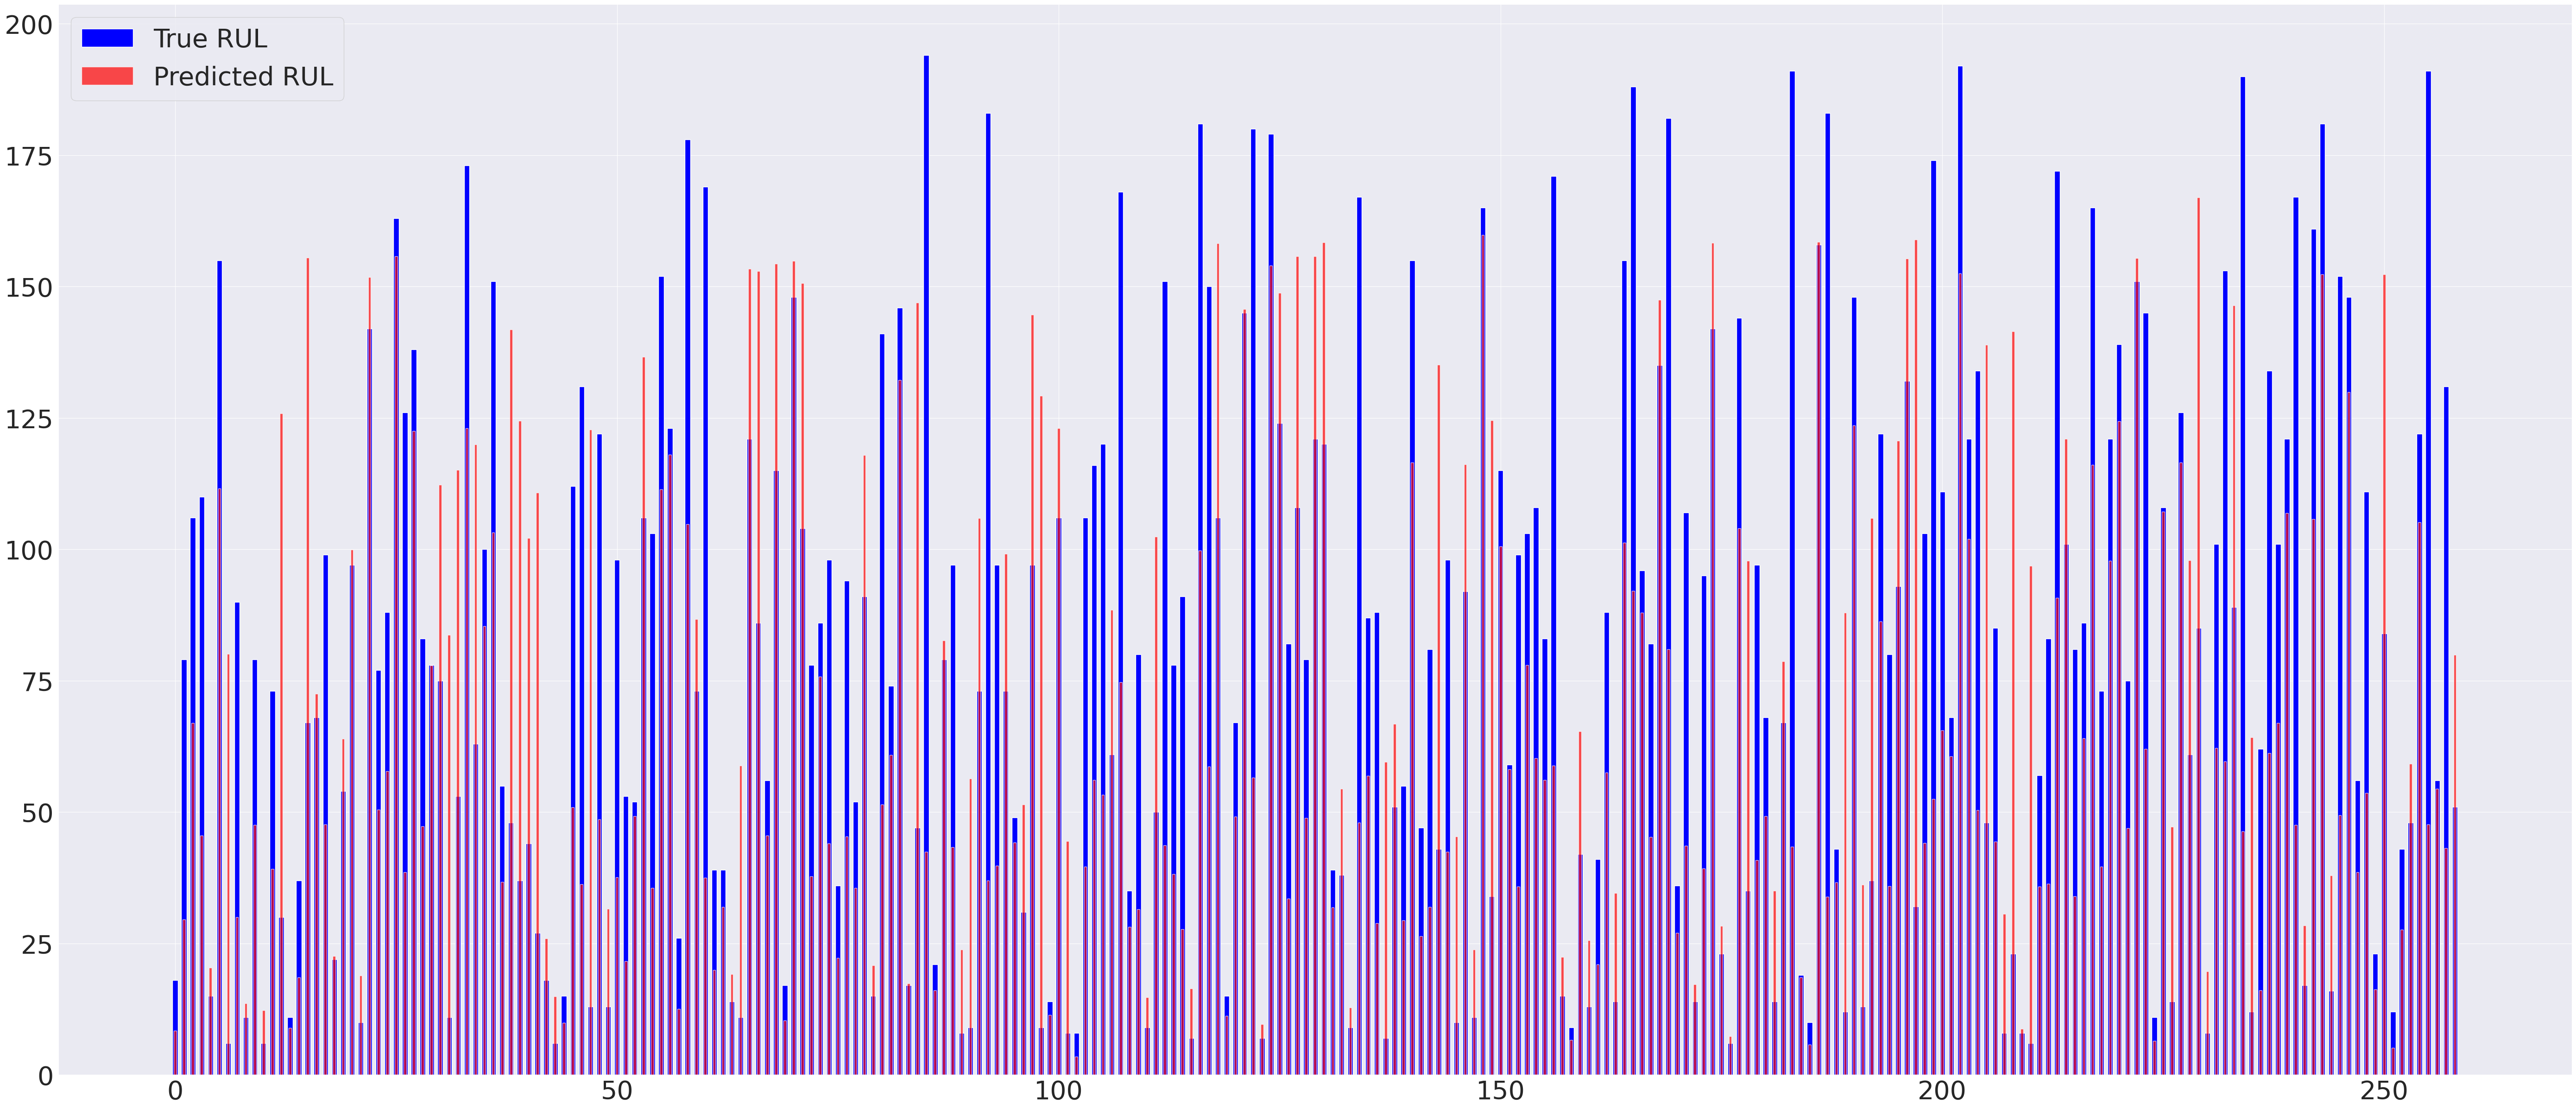

In [41]:
plot_predActual(y_valid, y_rf_valid)

# Third Attempt
#### In this section we are trying to discover a time series pattern in our features as we add to our data a new feature called 'rolling mean feature'. It's a equivalent to the mean value of a feature considering 10 time cycles. It will be computed for every feature.

In [42]:
df=train.copy()
for x in X_train_2.columns:
    df[x+'_rm']=0


df.columns

Index(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3',
       's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
       's_20', 's_21', 'RUL', 's_2_rm', 's_3_rm', 's_4_rm', 's_7_rm', 's_8_rm',
       's_9_rm', 's_12_rm', 's_13_rm', 's_14_rm', 's_17_rm'],
      dtype='object')

In [43]:
drop_labels2=['s_1', 's_5','s_6','s_10',  's_16', 's_18', 's_19']
df=df.drop(columns=setting_names+drop_labels2+['RUL'], axis=1)

X_valid_3=valid.drop(columns=index_names+setting_names+drop_labels2, axis=1)

In [44]:
def update_rolling_mean(data, mask):
    for x, group in mask.groupby("unit_number"):
        for x in X_train_2.columns:
            data.loc[group.index[10:], x+"_rm"] = data.loc[group.index, x].rolling(10).mean()[10:]
            data.loc[group.index[:10], x+"_rm"] = data.loc[group.index[:10], x]

update_rolling_mean(df, df)
update_rolling_mean(X_valid_3, valid)

X_valid_3=X_valid_3.fillna(0)

In [45]:
df.iloc[-1,-14:]=df.iloc[-2,-14:]
X_valid_3.iloc[-1,-14:]=X_valid_3.iloc[-2,-14:]

In [46]:
train_tm=df

In [47]:
train_tm=train_tm.drop(columns=index_names, axis=1)

In [48]:
X_train_tm, X_test_tm, y_train_tm, y_test_tm=train_test_split(train_tm,train['RUL'].clip(upper=195), test_size=0.35, random_state=42)
X_train_tm_s=scaler.fit_transform(X_train_tm)
X_test_tm_s=scaler.fit_transform(X_test_tm)
X_val3=pd.concat([valid['unit_number'],X_valid_3],axis=1)
X_valid3 = X_val3.groupby('unit_number').last().reset_index().drop(columns=['unit_number'])
X_valid_s=scaler.fit_transform(X_valid3)

In [49]:
#Linear Regression

lr=Linear_Regression()
lr.fit(X_train_tm_s, y_train_tm)

y_lr_train = lr.predict(X_train_tm_s)
evaluate(y_train_tm,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_tm_s)
evaluate(y_test_tm, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:62.260999777387596, R2:-0.05059811256433333
test set RMSE:61.86341854164285, R2:-0.05125733197449733
valid set RMSE:59.84627548468939, R2:-0.23837488062493906


In [50]:
regressor.fit(X_train_tm_s, y_train_tm)

y_svr_train = regressor.predict(X_train_tm_s)
evaluate(y_train_tm,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_tm_s)
evaluate(y_test_tm, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_s)
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:50.297147680499144, R2:0.3143678875119408
test set RMSE:50.15977311626291, R2:0.3088817931774761
valid set RMSE:53.38816952203534, R2:0.014474329742092285


In [51]:
#Random forest

rf = RandomForestRegressor(max_features="sqrt", random_state=42)
rf.fit(X_train_tm_s, y_train_tm)
# predict and evaluate
y_hat_train = rf.predict(X_train_tm_s)
evaluate(y_train_tm,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:12.467440817345496, R2:0.9578731422344164
test set RMSE:46.47598693978427, R2:0.40666707415224246
valid set RMSE:40.46693152568214, R2:0.4337888356424766


In [52]:
# Performing Grid search

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = {
    'n_estimators': [50,90,120],
    'max_depth' : [8,9,10],
}

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=3)

grid.fit(X_train_tm_s, y_train_tm)

print(grid.best_score_ , grid.best_params_)
#max_features=5,

0.6555298173375227 {'max_depth': 10, 'n_estimators': 50}


In [54]:
rf=RandomForestRegressor(n_estimators=90,  max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train_tm_s, y_train_tm)
# predict and evaluate
y_hat_train = rf.predict(X_train_tm_s)
evaluate(y_train_tm,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:34.05555131998072, R2:0.6856740284604113
test set RMSE:70.49418805647645, R2:-0.3650477166112327
valid set RMSE:60.405590165465796, R2:-0.2616303934582571


In [53]:
# Params found using Bayesian Optimisation
xgb = xgboost.XGBRegressor(n_estimators=50,
                           max_depth=6,
                           learning_rate=0.1,
                           reg_lambda=0.02,
                           gamma=0.4,
                           random_state=42)
xgb.fit(X_train_tm_s, y_train_tm)

# predict and evaluate
y_hat_train = xgb.predict(X_train_tm_s)
evaluate(y_train_tm, y_hat_train, 'train')

y_hat_test = xgb.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test)

y_hat_valid = xgb.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:32.3053591467913, R2:0.7171516934539803
test set RMSE:60.061870552303965, R2:0.009079268418551334
valid set RMSE:52.36703008632705, R2:0.05181349951682135


In [55]:
from sklearn.model_selection import KFold
train_tm_cv=train_tm.copy()
y=train['RUL'].clip(upper=195)
scores_train=[]
scores_test=[]
scores_validation=[]

cv = KFold(n_splits=4, shuffle=True)
for train_index, test_index in cv.split(train_tm) :
    print("Index du train : ", train_index, "\n")
    print("Index de test : ", test_index)
    X_train, X_test, y_train, y_test = train_tm.iloc[train_index,:], train_tm.iloc[test_index,:],y[train_index], y[test_index]
    regressor.fit(scaler.fit_transform(X_train), y_train)
    y_hat_train = regressor.predict(scaler.fit_transform(X_train))
    evaluate(y_train,y_hat_train, label='train')
    y_hat_test = regressor.predict(scaler.fit_transform(X_test))
    evaluate(y_test, y_hat_test, label='test')
    y_hat_valid = regressor.predict(scaler.fit_transform(X_valid3))
    evaluate(y_valid, y_hat_valid, label='valid')


Index du train :  [    0     1     2 ... 53754 53755 53757] 

Index de test :  [    5     6     7 ... 53751 53756 53758]
train set RMSE:49.19296455223928, R2:0.3402314002840777
test set RMSE:49.74146004553724, R2:0.3288362008198259
valid set RMSE:52.296652311813304, R2:0.054360385007676815
Index du train :  [    0     1     2 ... 53755 53756 53758] 

Index de test :  [    9    16    23 ... 53745 53746 53757]
train set RMSE:49.32862252681533, R2:0.33879559090284106
test set RMSE:49.786470799331056, R2:0.32086326121976927
valid set RMSE:52.107005567892934, R2:0.06120641795366566
Index du train :  [    2     3     5 ... 53756 53757 53758] 

Index de test :  [    0     1     4 ... 53752 53754 53755]
train set RMSE:49.19408733416222, R2:0.3397139941697004
test set RMSE:49.93947324502308, R2:0.3249168380426093
valid set RMSE:52.09920431529067, R2:0.06148750175622286
Index du train :  [    0     1     4 ... 53756 53757 53758] 

Index de test :  [    2     3    13 ... 53748 53749 53753]
train 

<BarContainer object of 24 artists>

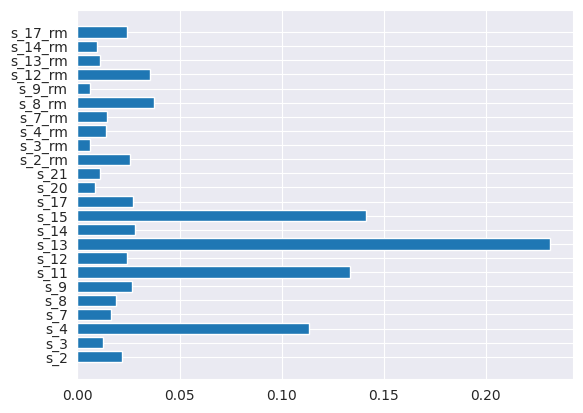

In [56]:
#BEST FEATURE FOR XGB MODEL
xgb.fit(X_train_tm_s, y_train_tm)
plt.barh(train_tm.columns, xgb.feature_importances_)

<BarContainer object of 24 artists>

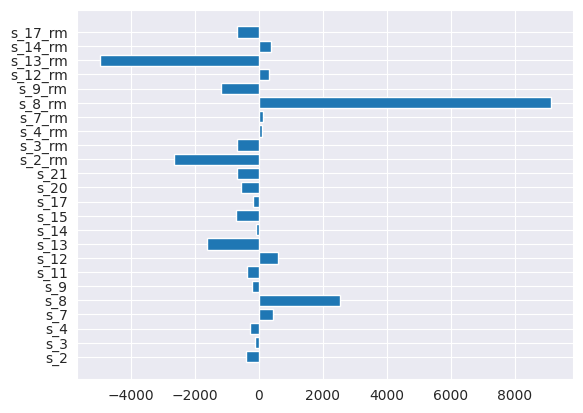

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=X_train_tm_s, y=y_train_tm)
plt.barh(X_train_tm.columns, model.coef_)

<BarContainer object of 24 artists>

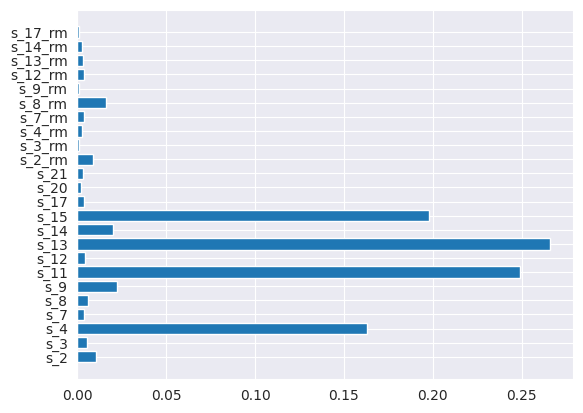

In [58]:
#BEST FEATURE FOR RF MODEL
rf.fit(X_train_tm_s, y_train_tm)
plt.barh(train_tm.columns, rf.feature_importances_)

In [59]:
dftm= pd.concat([train['unit_number'],train_tm,train['RUL']],axis=1)

dftm

,unit_number,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,...,s_3_rm,s_4_rm,s_7_rm,s_8_rm,s_9_rm,s_12_rm,s_13_rm,s_14_rm,s_17_rm,RUL
0,1,555.32,1358.61,1137.23,194.64,2222.65,8341.91,42.02,183.06,2387.72,...,1358.610,1137.230,194.640,2222.650,8341.910,183.060,2387.720,8048.560,334.0,148
1,1,549.90,1353.22,1125.78,138.51,2211.57,8303.96,42.20,130.42,2387.66,...,1353.220,1125.780,138.510,2211.570,8303.960,130.420,2387.660,8072.300,330.0,147
2,1,537.31,1256.76,1047.45,175.71,1915.11,8001.42,36.69,164.22,2028.03,...,1256.760,1047.450,175.710,1915.110,8001.420,164.220,2028.030,7864.870,309.0,146
3,1,549.51,1354.03,1126.38,138.46,2211.58,8303.96,41.96,130.72,2387.61,...,1354.030,1126.380,138.460,2211.580,8303.960,130.720,2387.610,8068.660,329.0,145
4,1,537.07,1257.71,1047.93,175.05,1915.10,7993.23,36.89,164.31,2028.00,...,1257.710,1047.930,175.050,1915.100,7993.230,164.310,2028.000,7861.230,309.0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,608.79,1495.60,1269.51,334.00,2324.92,8852.27,44.72,314.05,2389.02,...,1493.764,1292.654,377.785,2287.699,8830.094,355.878,2352.889,8183.596,367.2,4
53755,260,605.81,1514.32,1324.12,392.46,2319.17,8915.86,46.08,371.22,2388.42,...,1484.799,1282.318,361.806,2280.804,8804.719,340.971,2352.913,8184.857,365.1,3
53756,260,537.48,1276.24,1057.92,175.11,1917.37,8114.33,37.14,163.74,2030.33,...,1463.030,1260.839,345.975,2240.069,8732.824,325.894,2317.054,8166.612,359.3,2
53757,260,537.84,1272.95,1066.30,174.81,1917.36,8112.63,37.32,164.37,2030.35,...,1452.558,1253.150,344.061,2209.327,8698.474,324.062,2281.097,8147.430,356.7,1


# New Features

In [60]:
def plot_signal(df, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(8).mean())

    plt.ylabel(signal_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()

In [61]:
for i in range(1,22):
     if i not in [1,5,6,10,16,18,19] :
        try:
            plot_signal(dftm, 's_'+str(i)+'_rm')
        except:
            pass

Output hidden; open in https://colab.research.google.com to view.

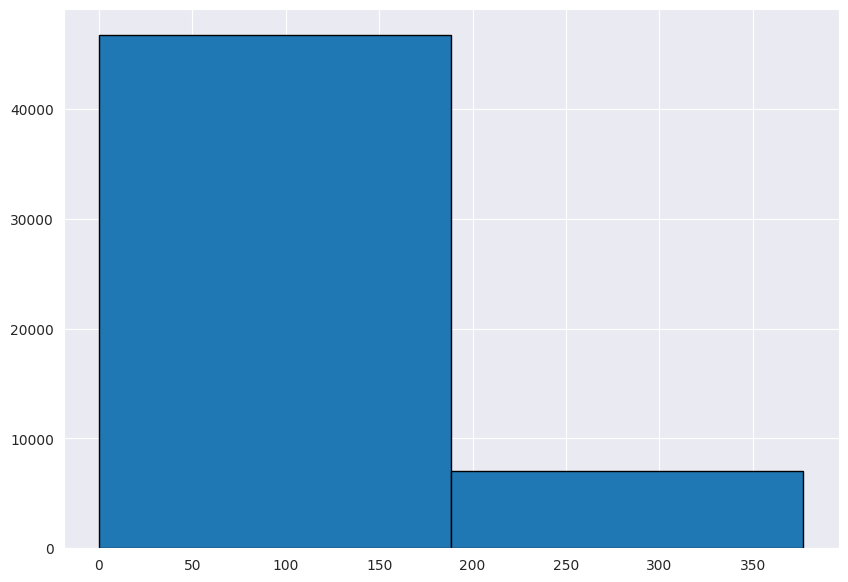

(array([46727.,  7032.]), array([  0. , 188.5, 377. ]), <BarContainer object of 2 artists>)


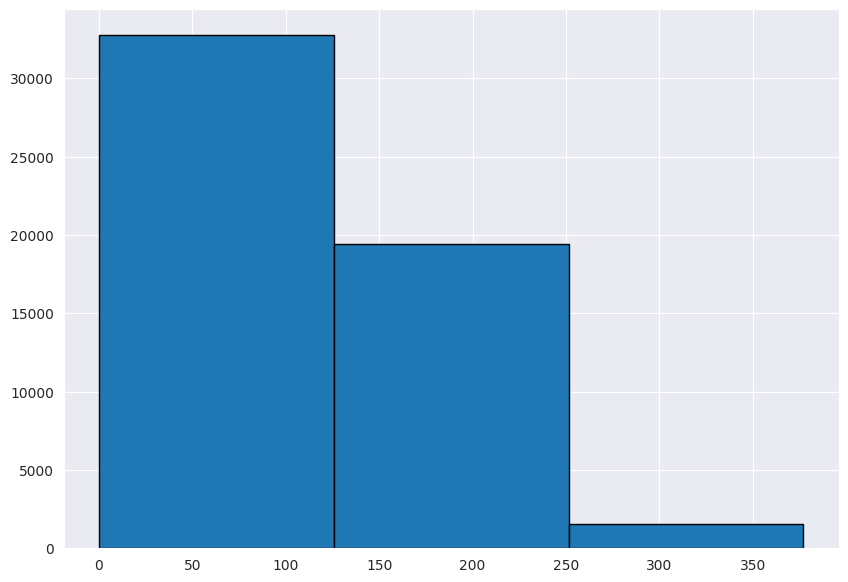

(array([32760., 19418.,  1581.]), array([  0.        , 125.66666667, 251.33333333, 377.        ]), <BarContainer object of 3 artists>)


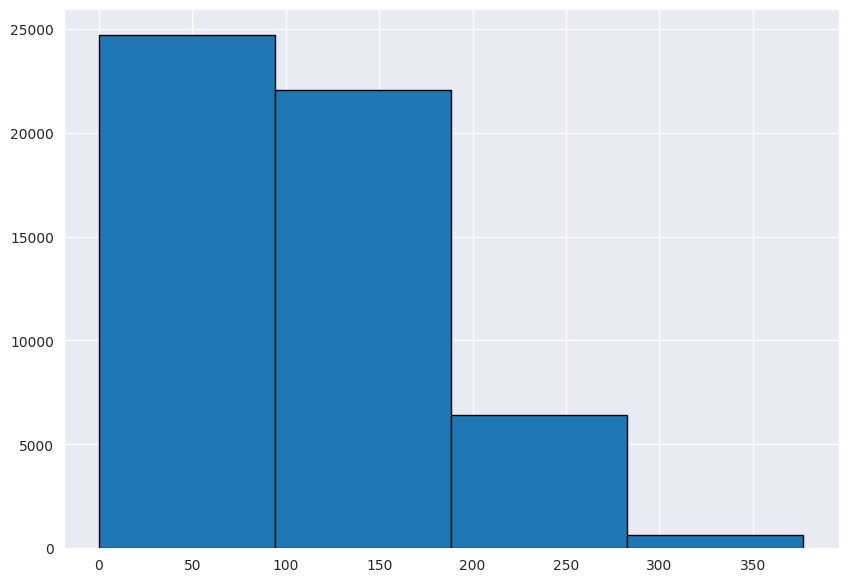

(array([24700., 22027.,  6395.,   637.]), array([  0.  ,  94.25, 188.5 , 282.75, 377.  ]), <BarContainer object of 4 artists>)


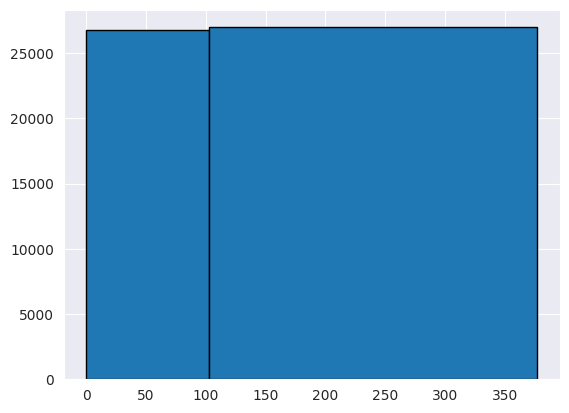

[  0. 103. 377.]


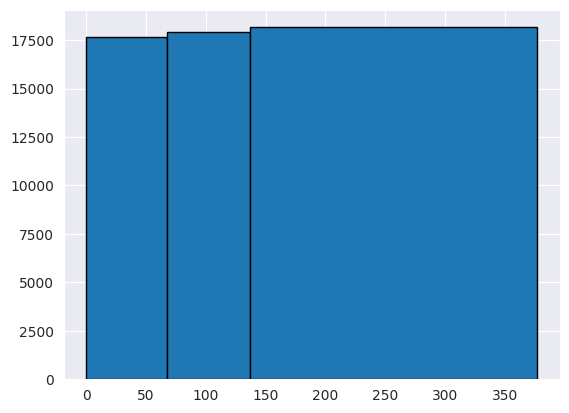

[  0.  68. 137. 377.]


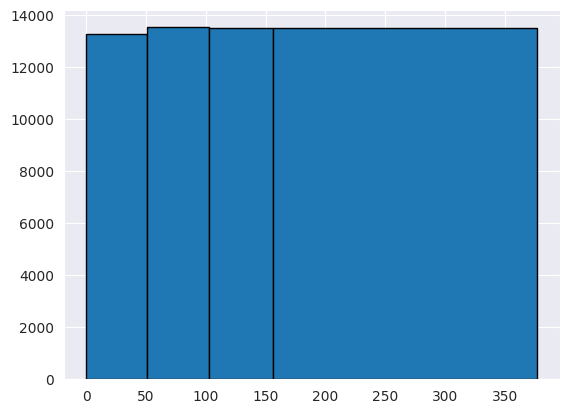

[  0.  51. 103. 156. 377.]


In [62]:
#-- fixing bins width -----
# Creating histogram of 2 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 2, edgecolor='black')
# Show plot
plt.show()
print(m)

# Creating histogram of 3 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 3, edgecolor='black')
# Show plot
plt.show()
print(m)

# Creating histogram of 4 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 4, edgecolor='black')
# Show plot
plt.show()
print(m)



#-- fixing bins height -----

l=len(list(train['RUL']))
k=l/4

#define function to calculate equal-frequency bins, bins=2
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 2), edgecolor='black')
plt.show()
print(bins)

#define function to calculate equal-frequency bins, bins=3
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 3), edgecolor='black')
plt.show()
print(bins)


#define function to calculate equal-frequency bins, bins=4
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 4), edgecolor='black')
plt.show()
print(bins)

In [63]:
y_train_tm

28051    129
51812     61
11919      5
34857    191
15965    107
        ... 
11284    107
44732     77
38158     82
860      152
15795    195
Name: RUL, Length: 34943, dtype: int64

In [64]:
label_map={1:"RISK ZONE",2:"MODERATED RISK",3:"NO RISK"}

y=[]

#--Transforming rul values to classes :
for k in dftm['RUL']:
    if k<=68:
        y.append(1)
    elif k>69 and k<=137:
        y.append(2)
    else:
        y.append(3)
X_train_tm_c, X_test_tm_c, y_train_tm_c, y_test_tm_c=train_test_split(dftm.drop(columns=['unit_number','RUL']),np.array(y), test_size=0.35, stratify=np.array(y))
X_train_tm_cs=scaler.fit_transform(X_train_tm_c)
X_test_tm_cs=scaler.fit_transform(X_test_tm_c)

In [65]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true)))

In [66]:
# Fit du  Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 1)

In [67]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [68]:
y_valid_c=[]
for k in y_valid['RUL']:
    if k<=68:
        y_valid_c.append(1)
    elif k>69 and k<=137:
        y_valid_c.append(2)
    else:
        y_valid_c.append(3)

y_valid_c=np.array(y_valid_c)

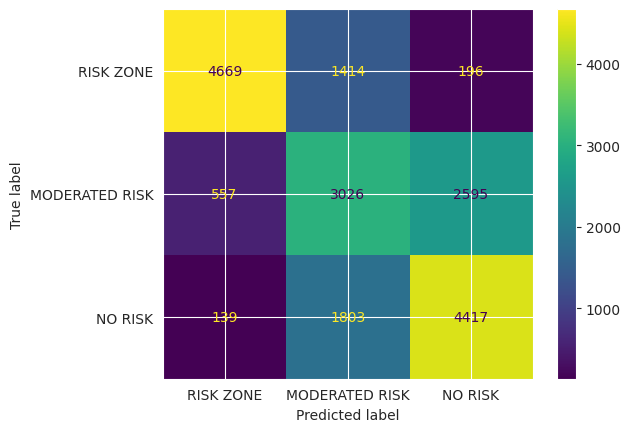

SVM
Accuracy score of training 0.645
Error rate of training 0.211
Accuracy score of test 0.644
Error rate of test 0.217
              precision    recall  f1-score   support

           1       0.87      0.74      0.80      6279
           2       0.48      0.49      0.49      6178
           3       0.61      0.69      0.65      6359

    accuracy                           0.64     18816
   macro avg       0.66      0.64      0.65     18816
weighted avg       0.66      0.64      0.65     18816



In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

classifier.fit(X_train_tm_cs,np.array(y_train_tm_c))
y_svc_train=classifier.predict(X_train_tm_cs)

y_svc_test=classifier.predict(X_test_tm_cs)


cm= confusion_matrix(y_test_tm_c, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('SVM')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train_tm_c, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_svc_test))
print(metrics.classification_report(y_test_tm_c,y_svc_test))

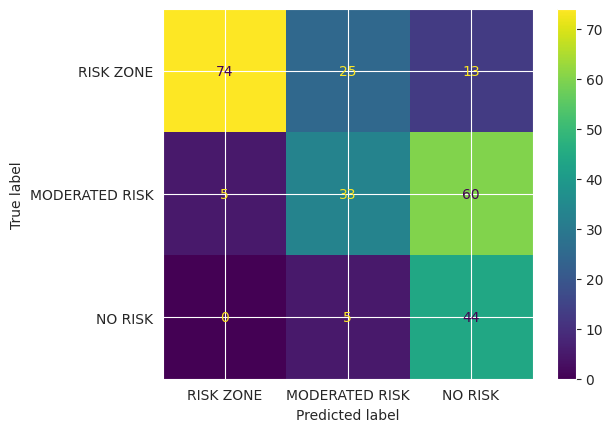

SVM
Accuracy score of validation 0.583
Error rate of validation 0.329
              precision    recall  f1-score   support

           1       0.94      0.66      0.77       112
           2       0.52      0.34      0.41        98
           3       0.38      0.90      0.53        49

    accuracy                           0.58       259
   macro avg       0.61      0.63      0.57       259
weighted avg       0.67      0.58      0.59       259



In [72]:
y_svc_valid=classifier.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_svc_valid, labels=classifier.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()
plt.show()
print('SVM')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c,  y_svc_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c, y_svc_valid))
print(metrics.classification_report(y_valid_c,  y_svc_valid))

In [71]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5)

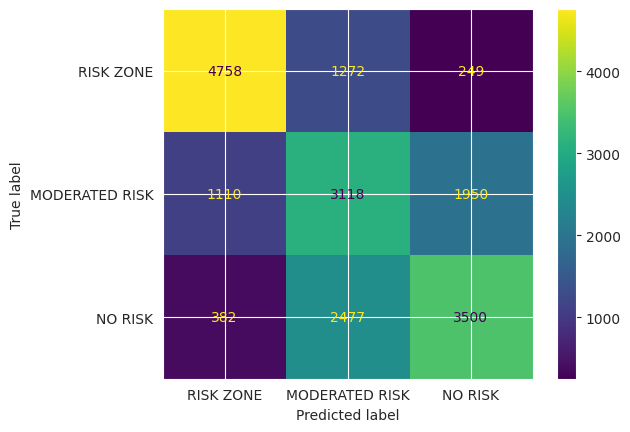

Random Forest Classifier
Accuracy score of test 0.961
Error rate of test 0.021
Accuracy score of test 0.605
Error rate of test 0.233
              precision    recall  f1-score   support

           1       0.76      0.76      0.76      6279
           2       0.45      0.50      0.48      6178
           3       0.61      0.55      0.58      6359

    accuracy                           0.60     18816
   macro avg       0.61      0.60      0.61     18816
weighted avg       0.61      0.60      0.61     18816



In [73]:
clf.fit(X_train_tm_cs,np.array(y_train_tm_c))
y_rfc_train=clf.predict(X_train_tm_cs)
y_rfc_test=clf.predict(X_test_tm_cs)
cm= confusion_matrix(y_test_tm_c, y_rfc_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[clf.classes_[0]],label_map[clf.classes_[1]],label_map[clf.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('Random Forest Classifier')
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_train_tm_c, y_rfc_train))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_rfc_train))

print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_rfc_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_rfc_test))

print(metrics.classification_report(y_test_tm_c,y_rfc_test))

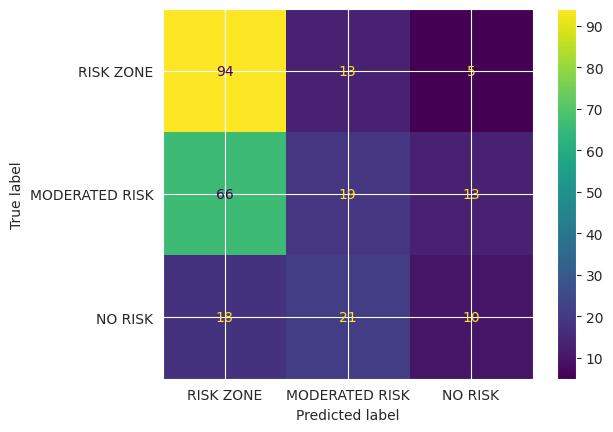

Random Forest Classifier
Accuracy score of validation 0.475
Error rate of validation 0.315
              precision    recall  f1-score   support

           1       0.53      0.84      0.65       112
           2       0.36      0.19      0.25        98
           3       0.36      0.20      0.26        49

    accuracy                           0.47       259
   macro avg       0.41      0.41      0.39       259
weighted avg       0.43      0.47      0.42       259



In [74]:
y_rfc_valid=clf.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_rfc_valid, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[clf.classes_[0]],label_map[clf.classes_[1]],label_map[clf.classes_[2]]])
disp.plot()
plt.show()
print('Random Forest Classifier')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c, y_rfc_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c,y_rfc_valid))
print(metrics.classification_report(y_valid_c,y_rfc_valid))

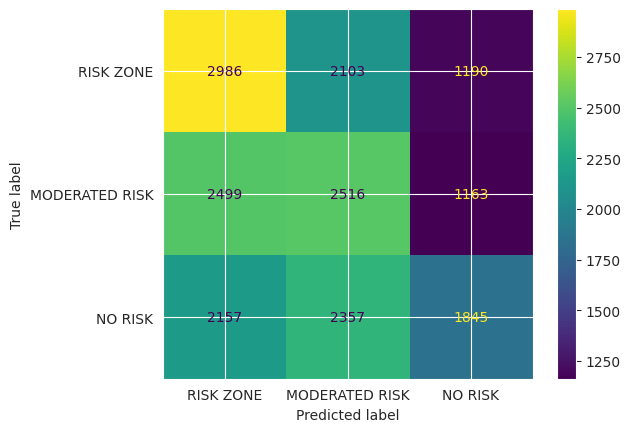

Guassian Naive Bayes
Accuracy score of train 0.390
Error rate of train 0.454
Accuracy score of test 0.390
Error rate of test 0.454
              precision    recall  f1-score   support

           1       0.39      0.48      0.43      6279
           2       0.36      0.41      0.38      6178
           3       0.44      0.29      0.35      6359

    accuracy                           0.39     18816
   macro avg       0.40      0.39      0.39     18816
weighted avg       0.40      0.39      0.39     18816



In [75]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_tm_cs,np.array(y_train_tm_c))

y_gnb_test= gnb.predict(X_test_tm_cs)
y_gnb_train= gnb.predict(X_train_tm_cs)


cm= confusion_matrix(y_test_tm_c, y_gnb_test, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[gnb.classes_[0]],label_map[gnb.classes_[1]],label_map[gnb.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('Guassian Naive Bayes')
print("Accuracy score of train %.3f" %metrics.accuracy_score(y_train_tm_c, y_gnb_train))
print("Error rate of train %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_gnb_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_gnb_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_gnb_test))

print(metrics.classification_report(y_test_tm_c,y_gnb_test))

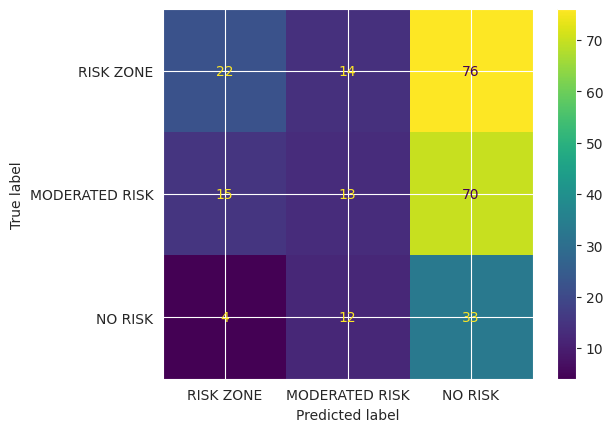

Random Forest Classifier
Accuracy score of validation 0.263
Error rate of validation 0.831
              precision    recall  f1-score   support

           1       0.54      0.20      0.29       112
           2       0.33      0.13      0.19        98
           3       0.18      0.67      0.29        49

    accuracy                           0.26       259
   macro avg       0.35      0.33      0.26       259
weighted avg       0.39      0.26      0.25       259



In [76]:
y_gnb_valid=gnb.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_gnb_valid, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[gnb.classes_[0]],label_map[gnb.classes_[1]],label_map[gnb.classes_[2]]])
disp.plot()
plt.show()
print('Random Forest Classifier')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c, y_gnb_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c,y_gnb_valid))
print(metrics.classification_report(y_valid_c,y_gnb_valid))

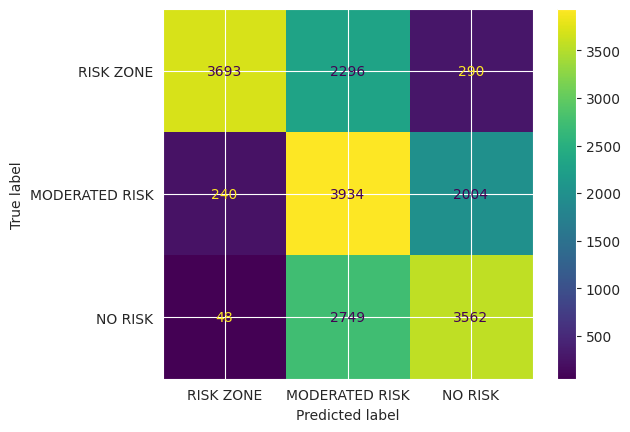

KNN
Accuracy score of train 0.627
Error rate of train 0.236
Accuracy score of test 0.595
Error rate of test 0.263
              precision    recall  f1-score   support

           1       0.93      0.59      0.72      6279
           2       0.44      0.64      0.52      6178
           3       0.61      0.56      0.58      6359

    accuracy                           0.59     18816
   macro avg       0.66      0.60      0.61     18816
weighted avg       0.66      0.59      0.61     18816



In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_tm_cs,np.array(y_train_tm_c))

y_knn_test= knn.predict(X_test_tm_cs)
y_knn_train= knn.predict(X_train_tm_cs)

cm= confusion_matrix(y_test_tm_c, y_knn_test, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[knn.classes_[0]],label_map[knn.classes_[1]],label_map[knn.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('KNN')
print("Accuracy score of train %.3f" %metrics.accuracy_score(y_train_tm_c, y_knn_train))
print("Error rate of train %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_knn_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_knn_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_knn_test))

print(metrics.classification_report(y_test_tm_c,y_knn_test))

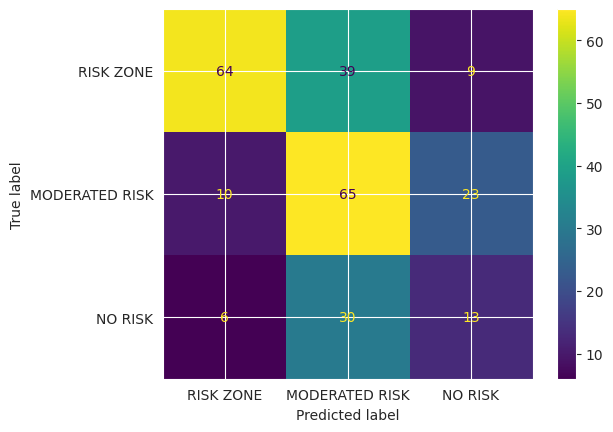

KNN
Accuracy score of validation 0.548
Error rate of validation 0.338
              precision    recall  f1-score   support

           1       0.80      0.57      0.67       112
           2       0.49      0.66      0.56        98
           3       0.29      0.27      0.28        49

    accuracy                           0.55       259
   macro avg       0.52      0.50      0.50       259
weighted avg       0.58      0.55      0.55       259



In [78]:
y_knn_valid=knn.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_knn_valid, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[knn.classes_[0]],label_map[knn.classes_[1]],label_map[knn.classes_[2]]])
disp.plot()
plt.show()
print('KNN')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c, y_knn_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c,y_knn_valid))
print(metrics.classification_report(y_valid_c,y_knn_valid))

In [79]:
def transform_to_classes(d):
    y=[]
    for k in d:
        if k<=68:
            y.append(1)
        elif k>69 and k<=137:
            y.append(2)
        else:
            y.append(3)
    return y

Index du train :  [    0     1     2 ... 53755 53757 53758] 

Index de test :  [    4     8    10 ... 53749 53754 53756]


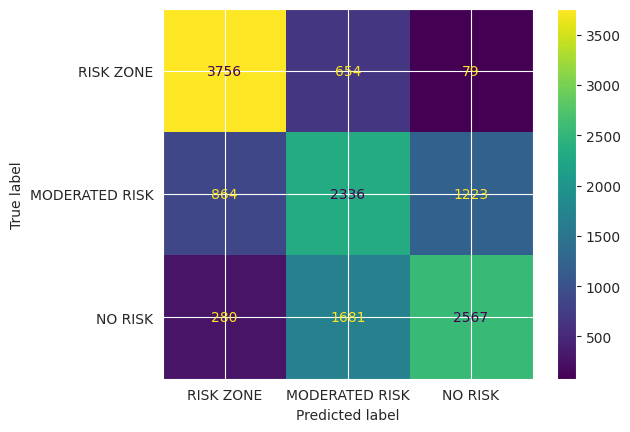

SVM
Accuracy score of training 0.644
Error rate of training 0.210
Accuracy score of test 0.644
Error rate of test 0.194
              precision    recall  f1-score   support

           1       0.77      0.84      0.80      4489
           2       0.50      0.53      0.51      4423
           3       0.66      0.57      0.61      4528

    accuracy                           0.64     13440
   macro avg       0.64      0.64      0.64     13440
weighted avg       0.64      0.64      0.64     13440

Index du train :  [    1     2     4 ... 53754 53756 53758] 

Index de test :  [    0     3     5 ... 53750 53755 53757]


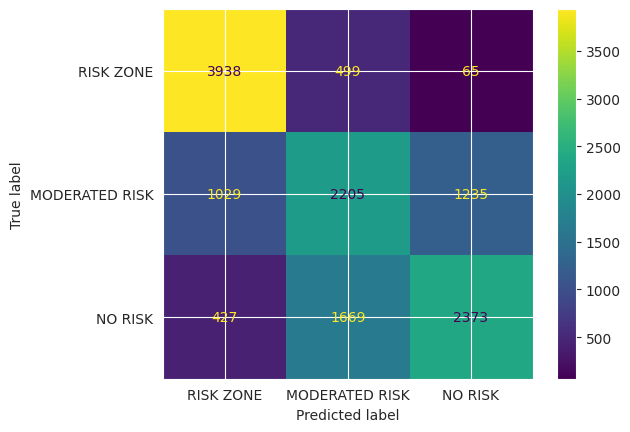

SVM
Accuracy score of training 0.647
Error rate of training 0.210
Accuracy score of test 0.634
Error rate of test 0.194
              precision    recall  f1-score   support

           1       0.73      0.87      0.80      4502
           2       0.50      0.49      0.50      4469
           3       0.65      0.53      0.58      4469

    accuracy                           0.63     13440
   macro avg       0.63      0.63      0.63     13440
weighted avg       0.63      0.63      0.63     13440

Index du train :  [    0     1     2 ... 53756 53757 53758] 

Index de test :  [   11    20    21 ... 53744 53751 53753]


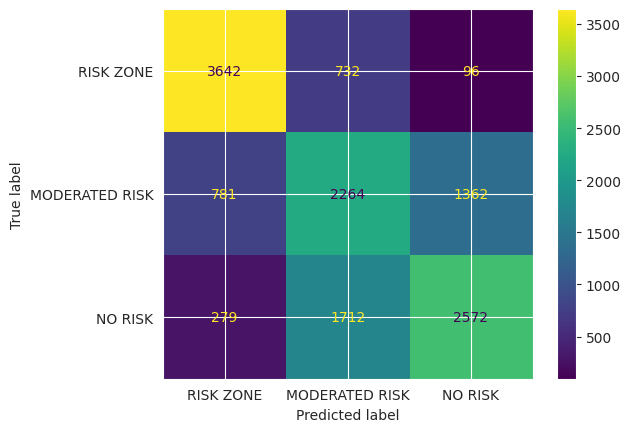

SVM
Accuracy score of training 0.651
Error rate of training 0.206
Accuracy score of test 0.631
Error rate of test 0.205
              precision    recall  f1-score   support

           1       0.77      0.81      0.79      4470
           2       0.48      0.51      0.50      4407
           3       0.64      0.56      0.60      4563

    accuracy                           0.63     13440
   macro avg       0.63      0.63      0.63     13440
weighted avg       0.63      0.63      0.63     13440

Index du train :  [    0     3     4 ... 53755 53756 53757] 

Index de test :  [    1     2     6 ... 53745 53752 53758]


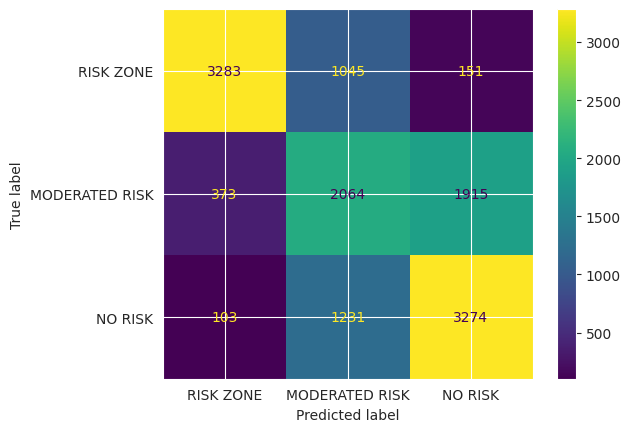

SVM
Accuracy score of training 0.645
Error rate of training 0.209
Accuracy score of test 0.641
Error rate of test 0.221
              precision    recall  f1-score   support

           1       0.87      0.73      0.80      4479
           2       0.48      0.47      0.47      4352
           3       0.61      0.71      0.66      4608

    accuracy                           0.64     13439
   macro avg       0.65      0.64      0.64     13439
weighted avg       0.66      0.64      0.65     13439



In [80]:
from sklearn.model_selection import KFold
train_tm_cv=dftm.drop(columns=['unit_number','RUL']).copy()
y=dftm['RUL']
cv = KFold(n_splits=4, shuffle=True)
for train_index, test_index in cv.split(train_tm) :
    print("Index du train : ", train_index, "\n")
    print("Index de test : ", test_index)
    X_train, X_test, y_train, y_test = train_tm_cv.iloc[train_index,:], train_tm_cv.iloc[test_index,:],np.array(transform_to_classes(y[train_index])), np.array(transform_to_classes(y[test_index]))
    classifier.fit(scaler.fit_transform(X_train), y_train)
    y_svc_train=classifier.predict(scaler.fit_transform(X_train))

    y_svc_test=classifier.predict(scaler.fit_transform(X_test))


    cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
    disp.plot()
    plt.show()

    # Measure the performance
    print('SVM')
    print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
    print("Error rate of training %.3f" %mean_absolute_percentage_error(y_train,y_svc_train))
    print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
    print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test,y_svc_test))
    print(metrics.classification_report(y_test,y_svc_test))

In [81]:
#let's save our regression model and build an API around it
import pickle

model_pkl_file = "RUL_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(regressor, file)

model_scaler_pkl_file = "RUL_model_scaler.pkl"

with open(model_scaler_pkl_file, 'wb') as file:
    pickle.dump(scaler, file)

In [82]:
regressor.predict(scaler.fit_transform(X_test))

array([154.72898641, 177.03060276, 154.99474554, ...,  32.78957023,
        21.57191938, -32.75694251])

In [83]:
X_test.iloc[[0]]

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,...,s_2_rm,s_3_rm,s_4_rm,s_7_rm,s_8_rm,s_9_rm,s_12_rm,s_13_rm,s_14_rm,s_17_rm
1,549.9,1353.22,1125.78,138.51,2211.57,8303.96,42.2,130.42,2387.66,8072.3,...,549.9,1353.22,1125.78,138.51,2211.57,8303.96,130.42,2387.66,8072.3,330.0


In [84]:
first_row = X_test.iloc[[0]]
json_data = first_row.to_dict(orient='records')[0]

print(json_data)

{'s_2': 549.9, 's_3': 1353.22, 's_4': 1125.78, 's_7': 138.51, 's_8': 2211.57, 's_9': 8303.96, 's_11': 42.2, 's_12': 130.42, 's_13': 2387.66, 's_14': 8072.3, 's_15': 9.3774, 's_17': 330, 's_20': 10.41, 's_21': 6.2665, 's_2_rm': 549.9, 's_3_rm': 1353.22, 's_4_rm': 1125.78, 's_7_rm': 138.51, 's_8_rm': 2211.57, 's_9_rm': 8303.96, 's_12_rm': 130.42, 's_13_rm': 2387.66, 's_14_rm': 8072.3, 's_17_rm': 330.0}


# THE END